# ___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 2 Handling Missing Values

## Introduction

### Importing Libraries

In [626]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

### Settings

In [627]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

### Reading scout_car.json file as a dataframe named df

In [628]:
df = pd.read_csv("scout_car_cleaned.csv")

### Creating a copy from df named df_copy

In [629]:
df_copy = df.copy()

### Checking the dataframe with head, tail and sample

In [630]:
# Checking the head of df

df.head()

,make_model,short_description,body_type,price,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770.0,56013.0,2.0,Used,2,"06/2021,99 g CO2/km (comb)","Yes,Euro 6",4 (Green),NaN,NaN,2016.0,Black,Metallic,5.0,5.0,Automatic,1422.0,3.0,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,NaN,66.0,06/2021,Yes,NaN,Cloth,Black,1220.0,3.8,4.3,3.5
1,Audi A1,1.8 TFSI sport,Sedans,14500.0,80000.0,NaN,Used,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Red,NaN,3.0,4.0,Automatic,1798.0,4.0,front,Benzine,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",4 (Green),7.0,141.0,NaN,NaN,NaN,Cloth,Grey,1255.0,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640.0,83450.0,1.0,Used,1,NaN,NaN,99 g CO2/km (comb),NaN,NaN,2016.0,Black,Metallic,4.0,4.0,Automatic,1598.0,NaN,front,Diesel (Particulate Filter),99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4 (Green),NaN,85.0,NaN,NaN,NaN,Cloth,Black,NaN,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500.0,73000.0,1.0,Used,1,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,2016.0,Brown,Metallic,3.0,4.0,Automatic,1422.0,3.0,NaN,Diesel (Particulate Filter),99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",NaN,6.0,66.0,NaN,NaN,NaN,NaN,NaN,1195.0,3.8,4.3,3.5
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790.0,16200.0,1.0,Used,1,NaN,"Yes,109 g CO2/km (comb)",Euro 6,4 (Green),NaN,2016.0,Black,Metallic,5.0,5.0,Automatic,1422.0,3.0,front,Diesel (Particulate Filter),109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",NaN,NaN,66.0,NaN,Yes,NaN,Cloth,Black,NaN,4.1,4.6,3.8


In [631]:
# Checking the tail of df

df.tail()

,make_model,short_description,body_type,price,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
15914,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950.0,NaN,NaN,New,NaN,NaN,NaN,24 months,NaN,NaN,NaN,Grey,Metallic,5.0,5.0,Automatic,1997.0,4.0,front,Diesel (Particulate Filter),139.0,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",NaN,6.0,147.0,NaN,NaN,24.0,NaN,NaN,1758.0,5.3,6.2,4.7
15915,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885.0,9900.0,1.0,Used,"1,,7.4 l/100 km (comb),,9.2 l/100 km (city),,6...","01/2022,168 g CO2/km (comb)",NaN,Euro 6,NaN,4 (Green),2019.0,Grey,Metallic,5.0,5.0,Automatic,1798.0,4.0,front,Benzine (Particulate Filter),168.0,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",NaN,7.0,165.0,01/2022,NaN,NaN,Cloth,NaN,1708.0,7.4,9.2,6.3
15916,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875.0,15.0,1.0,Pre-registered,"1,139 g CO2/km (comb)",NaN,"Yes,Euro 6d-TEMP",4 (Green),NaN,NaN,2019.0,White,NaN,5.0,7.0,Automatic,1997.0,4.0,front,Diesel,139.0,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",NaN,6.0,146.0,NaN,Yes,NaN,Full leather,Black,NaN,5.3,6.2,4.7
15917,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,39700.0,10.0,NaN,Pre-registered,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,Grey,NaN,5.0,7.0,Automatic,1997.0,4.0,front,Diesel,139.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",NaN,6.0,147.0,NaN,NaN,NaN,Part leather,NaN,1758.0,5.3,6.2,4.7
15918,Renault Espace,INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX,Van,40999.0,NaN,1.0,Demonstration,1,NaN,"Yes,153 g CO2/km (comb)",NaN,NaN,NaN,2019.0,Grey,Metallic,5.0,5.0,Automatic,1798.0,4.0,4WD,Benzine,153.0,Euro 6,"Air conditioning,Automatic climate control,Cru...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,...",4 (Green),NaN,165.0,NaN,Yes,NaN,Full leather,Brown,1685.0,6.8,8.7,5.7


In [632]:
# Checking the df by taking samples

df.sample(10)

,make_model,short_description,body_type,price,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
7070,Opel Astra,K ST 1.4 T Edition NAVI*SITZHEIZ*BLUETOOTH,Station wagon,18989.0,8265.0,1.0,Used,1,NaN,NaN,"60 months,,5.4 l/100 km (comb),,7.1 l/100 km (...",125 g CO2/km (comb),Euro 6,2018.0,Blue,NaN,5.0,5.0,Automatic,1399.0,NaN,NaN,Benzine,125.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack,Sport seats","ABS,Alarm system,Central door lock,Daytime run...",4 (Green),6.0,110.0,NaN,NaN,60.0,Cloth,Black,NaN,5.4,7.1,4.4
6973,Opel Astra,Sports Tourer Astra ST Edition 1.6 CDTI ecoFLE...,Station wagon,11980.0,69186.0,1.0,Used,1,NaN,"Yes,95 g CO2/km (comb)",Euro 6,4 (Green),NaN,2017.0,Black,Metallic,5.0,5.0,Manual,1598.0,4.0,front,Diesel (Particulate Filter),95.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Hands-free equipment,On-board computer,Radio,USB",Roof rack,"ABS,Central door lock,Daytime running lights,D...",NaN,NaN,81.0,NaN,Yes,NaN,NaN,Other,1393.0,3.5,4.0,3.2
833,Audi A1,1.4 TDI sport Sportsitze|PDC|Sitzheizung,Sedans,13970.0,49289.0,NaN,Used,NaN,03/2021,NaN,"12 months,109 g CO2/km (comb)",Euro 6,4 (Green),2016.0,Black,NaN,3.0,4.0,Manual,1422.0,NaN,NaN,Diesel (Particulate Filter),109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats","ABS,Central door lock,Daytime running lights,E...",NaN,5.0,66.0,03/2021,NaN,12.0,Cloth,Black,NaN,4.1,4.6,3.8
12982,Opel Insignia,Sports Tourer 1.5 Turbo Business,Station wagon,25475.0,NaN,NaN,New,NaN,NaN,"Yes,128 g CO2/km (comb)",NaN,NaN,Euro 6d-TEMP,NaN,NaN,NaN,5.0,5.0,Manual,1490.0,4.0,front,Benzine,128.0,Euro 6d-TEMP,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,Digital radio,On-board computer,Radi...","Catalytic Converter,Roof rack,Touch screen","ABS,Adaptive Cruise Control,Central door lock,...",4 (Green),6.0,103.0,NaN,Yes,NaN,Cloth,Other,1487.0,5.6,7.1,4.8
13180,Renault Clio,TCe120*AUTOMATIK*NAVI*LEDER*KAMERA*LED*PDC,Compact,14990.0,16600.0,1.0,Used,1,NaN,NaN,NaN,120 g CO2/km (comb),Euro 6,2018.0,White,Metallic,4.0,5.0,Automatic,1197.0,NaN,NaN,Benzine,120.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Touch screen","ABS,Adaptive headlights,Central door lock,Dayt...",4 (Green),NaN,87.0,NaN,NaN,NaN,Part leather,Black,NaN,5.4,6.8,4.5
1486,Audi A1,"Sportback 1.4 TDI sport Euro 6, Xenon, Sitzheiz",Sedans,16430.0,10784.0,NaN,Used,NaN,02/2021,NaN,109 g CO2/km (comb),Euro 6,4 (Green),2018.0,Black,Metallic,5.0,4.0,Manual,1422.0,NaN,NaN,Diesel,109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,NaN,66.0,02/2021,NaN,NaN,NaN,Black,1345.0,4.1,4.6,3.8
12640,Opel Insignia,Sports Tourer Dynamic 1.5 Turbo Automatik,Station wagon,31890.0,3500.0,1.0,Demonstration,1,"04/2022,,6.2 l/100 km (comb),,7.7 l/100 km (ci...","Yes,141 g CO2/km (comb)",NaN,Euro 6,4 (Green),2019.0,Grey,Metallic,5.0,5.0,Automatic,1500.0,NaN,front,Benzine,141.0,NaN,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Adaptive headlight...",NaN,6.0,121.0,04/2022,Yes,NaN,Part leather,Black,1487.0,6.2,7.7,5.3
12769,Opel Insignia,Grand Sp

### Checking the summary information of df

In [633]:
# Checking the summary information of df with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   short_description    15873 non-null  object 
 2   body_type            15859 non-null  object 
 3   price                15919 non-null  float64
 4   km                   14895 non-null  float64
 5   prev_owner           9091 non-null   float64
 6   type                 15917 non-null  object 
 7   previous_owners      9279 non-null   object 
 8   next_inspection      3535 non-null   object 
 9   inspection_new       3932 non-null   object 
 10  warranty             9156 non-null   object 
 11  full_service         6230 non-null   object 
 12  non_smoking_vehicle  3460 non-null   object 
 13  first_registration   14322 non-null  float64
 14  body_color           15322 non-null  object 
 15  paint_type           10147 non-null 

### Checking the number of null values of df

In [634]:
df.isnull().sum()

make_model                 0
short_description         46
body_type                 60
price                      0
km                      1024
prev_owner              6828
type                       2
previous_owners         6640
next_inspection        12384
inspection_new         11987
warranty                6763
full_service            9689
non_smoking_vehicle    12459
first_registration      1597
body_color               597
paint_type              5772
nr_of_doors              212
nr_of_seats              977
gearing_type               0
displacement_cc          496
cylinders               5680
drive_chain             6858
fuel                       0
co_2_emission           2436
emission_class          3628
comfort_convenience      920
entertainment_media     1374
extras                  2962
safety_security          982
emission_label         11974
gears                   4712
hp_kw                     88
next_insp_date         12384
insp_new               11987
warranty_month

### Finding columns including missing values

In [635]:
# checking columns including null values
missing_value_col = []
[missing_value_col.append(i) for i in df.columns if any(df[i].isnull())]
missing_value_col

['short_description',
 'body_type',
 'km',
 'prev_owner',
 'type',
 'previous_owners',
 'next_inspection',
 'inspection_new',
 'warranty',
 'full_service',
 'non_smoking_vehicle',
 'first_registration',
 'body_color',
 'paint_type',
 'nr_of_doors',
 'nr_of_seats',
 'displacement_cc',
 'cylinders',
 'drive_chain',
 'co_2_emission',
 'emission_class',
 'comfort_convenience',
 'entertainment_media',
 'extras',
 'safety_security',
 'emission_label',
 'gears',
 'hp_kw',
 'next_insp_date',
 'insp_new',
 'warranty_month',
 'upholstery_type',
 'upholstery_color',
 'weight_kg',
 'consumption_comb',
 'consumption_city',
 'consumption_country']

In [636]:
len(missing_value_col)  # the number of columns including null values

37

### Finding the columns not including missing values

In [637]:
notna_col = []
[notna_col.append(i) for i in df.columns if all(df[i].notna())]
notna_col

['make_model', 'price', 'gearing_type', 'fuel']

In [638]:
len(notna_col)  # the number of columns not including null values

4

##   Handling With Missing Values 

Now, let's examine the columns including null values and try to fill it in the most appropriate way. First of all, we define a function named null_check to check some information about columns.

In [639]:
def null_check (col) :
    print("Column name :", col)
    print("--"*30)
    print("Number of nulls :", df[col].isnull().sum())
    print("Percent of nulls :", '%', round((df[col].isnull().sum()/df.shape[0])*100, 2))
    print("Value_counts :", "\n", df[col].value_counts(dropna=False))

### body_type

In [640]:
df.body_type

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: body_type, Length: 15919, dtype: object

In [641]:
null_check("body_type")

Column name : body_type
------------------------------------------------------------
Number of nulls : 60
Percent of nulls : % 0.38
Value_counts : 
 Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [642]:
df.groupby("make_model")["body_type"].value_counts(dropna=False)

make_model      body_type    
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2598
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                NaN                 7
                Coupe               4
Opel Astra      Station wagon    1211
                Sedans           1053
                Compact           185
                Other              67
                NaN                 7
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            875
                Other              87
                Coupe              13
                Tran

In [643]:
df.groupby("make_model")["body_type"].apply(list)

make_model
Audi A1           [Sedans, Sedans, Sedans, Sedans, Sedans, Sedan...
Audi A2                                                  [Off-Road]
Audi A3           [Convertible, Sedans, Sedans, Sedans, Sedans, ...
Opel Astra        [Station wagon, Station wagon, Station wagon, ...
Opel Corsa        [Sedans, Sedans, Sedans, Compact, Compact, Com...
Opel Insignia     [Station wagon, Sedans, Station wagon, Station...
Renault Clio      [Compact, Station wagon, Sedans, Station wagon...
Renault Duster    [Off-Road, Off-Road, Off-Road, Off-Road, Off-R...
Renault Espace    [nan, Station wagon, Transporter, Van, Van, Tr...
Name: body_type, dtype: object

In [644]:
df.body_type.mode()

0    Sedans
dtype: object

In [645]:
df.groupby("make_model")["body_type"].apply(lambda x: x.mode()[0])

make_model
Audi A1                  Sedans
Audi A2                Off-Road
Audi A3                  Sedans
Opel Astra        Station wagon
Opel Corsa              Compact
Opel Insignia     Station wagon
Renault Clio             Sedans
Renault Duster         Off-Road
Renault Espace              Van
Name: body_type, dtype: object

In [646]:
df.groupby("make_model")["body_type"].describe()

,count,unique,top,freq
make_model,,,,
Audi A1,2614,6,Sedans,1538
Audi A2,1,1,Off-Road,1
Audi A3,3090,6,Sedans,2598
Opel Astra,2519,6,Station wagon,1211
Opel Corsa,2217,7,Compact,1230
Opel Insignia,2595,7,Station wagon,1611
Renault Clio,1824,8,Sedans,918
Renault Duster,34,1,Off-Road,34
Renault Espace,965,8,Van,777


In [647]:
# fill null values with mode of each group by grouping data according to make_model

df["body_type"] = df.groupby("make_model")["body_type"].apply(lambda x: x.fillna(x.mode()[0]))

In [648]:
null_check("body_type")

Column name : body_type
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [649]:
df["body_type"].size

15919

### type column

In [650]:
df.type

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: type, Length: 15919, dtype: object

In [651]:
null_check("type")

Column name : type
------------------------------------------------------------
Number of nulls : 2
Percent of nulls : % 0.01
Value_counts : 
 Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64


In [652]:
df[df.type.isnull()]

,make_model,short_description,body_type,price,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
2765,Audi A3,SPB 2.0 TDI S tronic Sport,Sedans,17900.0,115137.0,NaN,NaN,NaN,NaN,NaN,Diesel,NaN,NaN,2016.0,White,NaN,5.0,5.0,Automatic,1968.0,4.0,front,Diesel,118.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Isofi...",1 (No sticker),6.0,110.0,NaN,NaN,NaN,Cloth,Other,NaN,4.5,5.3,4.1
5237,Audi A3,SPB 1.6 TDI 116 CV S tronic,Sedans,25400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grey,NaN,5.0,5.0,Automatic,1598.0,4.0,front,Diesel,103.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofi...",1 (No sticker),7.0,85.0,NaN,NaN,NaN,Cloth,Other,NaN,3.9,4.1,3.7


In [653]:
df.type.mode()[0]

'Used'

In [654]:
# filling with the mode of type column

df["type"] = df.type.fillna(df.type.mode()[0])

In [655]:
null_check("type")

Column name : type
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 Used              11098
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: type, dtype: int64


In [656]:
df.type.size

15919

### age(first_registration) column

In [657]:
null_check("first_registration")

Column name : first_registration
------------------------------------------------------------
Number of nulls : 1597
Percent of nulls : % 10.03
Value_counts : 
 2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
NaN       1597
Name: first_registration, dtype: int64


In [658]:
# Creating a new column named "age" by using first_registration

# Remember that last year is 2019
    
df["age"] = 2019 - df.first_registration

In [659]:
df.age

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
15914    NaN
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: age, Length: 15919, dtype: float64

In [660]:
# drop first_registration column
df.drop(columns="first_registration", inplace=True)

In [661]:
df.age.describe()

count    14322.000000
mean         1.542382
std          1.076917
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: age, dtype: float64

In [662]:
df.shape

(15919, 41)

In [663]:
null_check("age")

Column name : age
------------------------------------------------------------
Number of nulls : 1597
Percent of nulls : % 10.03
Value_counts : 
 1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64


Now, let's treat missing values of age column:

In [664]:
df.groupby("type").age.describe().T

type,Demonstration,Employee's car,New,Pre-registered,Used
count,791.000000,1008.000000,103.000000,1358.000000,11062.000000
mean,0.240202,1.005952,0.029126,0.134021,1.871361
std,0.516024,0.540297,0.168983,0.365829,0.958498
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,2.000000
75%,0.000000,1.000000,0.000000,0.000000,3.000000
max,3.000000,3.000000,1.000000,3.000000,3.000000


In [665]:
df.groupby(["type"])[["age"]].mean().value_counts()

age     
0.029126    1
0.134021    1
0.240202    1
1.005952    1
1.871361    1
dtype: int64

In [666]:
df.groupby(["type"]).age.apply(lambda x: x.fillna(x.median())).isnull().sum()

0

In [667]:
# type'a göre gruplayıp age'in medianı ile doldurma

df["age"] = df.groupby(["type"]).age.apply(lambda x: x.fillna(x.median()))

In [668]:
null_check("age")

Column name : age
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 1.0    4525
0.0    4411
3.0    3674
2.0    3309
Name: age, dtype: int64


In [669]:
df.age.describe()

count    15919.000000
mean         1.392361
std          1.119938
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: age, dtype: float64

### km column

In [670]:
null_check("km")

Column name : km
------------------------------------------------------------
Number of nulls : 1024
Percent of nulls : % 6.43
Value_counts : 
 10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6690, dtype: int64


In [671]:
df.km.describe()

count     14895.000000
mean      34130.127828
std       37352.977568
min           0.000000
25%        5153.000000
50%       22740.000000
75%       49371.500000
max      317000.000000
Name: km, dtype: float64

In [672]:
df.groupby(["type", "age"]).km.describe().T

type  Demonstration                                           Employee's car  \
age             0.0           1.0           2.0           3.0            0.0   
count    604.000000    130.000000     27.000000      2.000000     121.000000   
mean    3373.867550   8294.200000  25327.296296  45500.000000    4473.933884   
std     3540.544241   7998.986641  17914.687197  14849.242405    5473.430160   
min        3.000000      8.000000     20.000000  35000.000000       1.000000   
25%      450.000000   1601.000000  15470.500000  40250.000000     150.000000   
50%     2900.000000   5192.500000  18900.000000  45500.000000    3811.000000   
75%     5000.000000  13737.500000  28238.000000  50750.000000    6300.000000   
max    20000.000000  38400.000000  78000.000000  56000.000000   37500.000000   

type                                                       New              \
age             1.0            2.0            3.0          0.0         1.0   
count    766.000000      99.000000      17.000000   799.000000    2.000000   
mean   19295.278068   37926.505051   59123.647059    16.987484   53.500000   
std     9381.306327   21932.485039   28115.753329    95.029727   65.760931   
min        1.000000      59.000000    7790.000000     0.000000    7.000000   
25%    11267.750000   22138.000000   40700.000000     5.000000   30.250000   
50%    21000.000000   37750.000000   58962.000000    10.000000   53.500000   
75%    26957.500000   46500.000000   84386.000000    10.000000   76.750000   
max    80009.000000  112789.000000  103000.000000  2500.000000  100.000000   

type  Pre-registered                                             Used  \
age              0.0           1.0           2.0   3.0            0.0   
count    1102.000000    134.000000      9.000000   1.0     803.000000   
mean      100.648820    435.514925   1854.000000  10.0    3712.170610   
std       649.074569   1902.269846   4129.196502   NaN    8499.409143   
min         1.000000      1.000000      1.000000  10.0       1.000000   
25%         7.000000     10.000000      1.000000  10.0      35.500000   
50%        10.000000     12.000000     99.000000  10.0    1233.000000   
75%        20.000000     80.000000    153.000000  10.0    5000.000000   
max      9998.000000  15378.000000  12300.000000  10.0  127022.000000   

type                                                
age              1.0            2.0            3.0  
count    3454.000000    3171.000000    3654.000000  
mean    18807.503474   41887.937559   77566.423098  
std     10952.380152   28563.951151   39184.188242  
min         1.000000       5.000000      35.000000  
25%     10800.000000   21533.500000   48103.750000  
50%     18000.000000   34732.000000   73000.000000  
75%     25096.250000   55000.000000   99987.500000  
max    136000.000000  317000.000000  291800.000000

In [673]:
df.groupby(["type", "age"]).km.apply(lambda x: x.fillna(x.median())).isnull().sum()

0

In [674]:
df.groupby(["type", "age"]).km.apply(lambda x: x.fillna(x.median())).describe()

count     15919.000000
mean      31962.416955
std       37071.843604
min           0.000000
25%        2000.000000
50%       20416.000000
75%       46898.500000
max      317000.000000
Name: km, dtype: float64

In [675]:
df.groupby(["type", "age"]).km.apply(lambda x: x.fillna(x.mean())).describe()

count     15919.000000
mean      31967.471741
std       37069.146561
min           0.000000
25%        2000.000000
50%       20413.000000
75%       46898.500000
max      317000.000000
Name: km, dtype: float64

Since there was not much difference between mean and median filling, it was decided to fill with median.

In [676]:
df["km"] = df.groupby(["type", "age"]).km.apply(lambda x: x.fillna(x.median()))

In [677]:
df.km.describe()

count     15919.000000
mean      31962.416955
std       37071.843604
min           0.000000
25%        2000.000000
50%       20416.000000
75%       46898.500000
max      317000.000000
Name: km, dtype: float64

In [678]:
null_check("km")

Column name : km
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 10.0       1984
1.0         367
5.0         170
50.0        148
100.0       139
           ... 
53433.0       1
67469.0       1
43197.0       1
10027.0       1
57.0          1
Name: km, Length: 6690, dtype: int64


In [679]:
df.km.size

15919

### prev_owner column

In [680]:
null_check("prev_owner")

Column name : prev_owner
------------------------------------------------------------
Number of nulls : 6828
Percent of nulls : % 42.89
Value_counts : 
 1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64


In [681]:
null_check("previous_owners")

Column name : previous_owners
------------------------------------------------------------
Number of nulls : 6640
Percent of nulls : % 41.71
Value_counts : 
 1                                                                      8103
NaN                                                                    6640
2                                                                       766
0                                                                       163
3                                                                        17
                                                                       ... 
1,111 g CO2/km (comb)                                                     1
1,Euro 6                                                                  1
2,119 g CO2/km (comb)                                                     1
1,,6.6 l/100 km (comb),,8.1 l/100 km (city),,5.7 l/100 km (country)       1
1,142 g CO2/km (comb)                                                     1
Name: 

In [682]:
df[["prev_owner","previous_owners"]].value_counts(dropna=False)

prev_owner  previous_owners                                                  
1.0         1                                                                    8103
NaN         NaN                                                                  6640
2.0         2                                                                     766
NaN         0                                                                     163
3.0         3                                                                      17
                                                                                 ... 
1.0         1,188 g CO2/km (comb)                                                   1
            1,84 g CO2/km (comb)                                                    1
            1,85 g CO2/km (comb)                                                    1
            1,96 g CO2/km (comb)                                                    1
            1,,4.9 l/100 km (comb),,6 l/100 km (city),,4.2 l/1

In [683]:
df.previous_owners.str.split(",").str[0].astype(float)

0        2.0
1        NaN
2        1.0
3        1.0
4        1.0
        ... 
15914    NaN
15915    1.0
15916    1.0
15917    NaN
15918    1.0
Name: previous_owners, Length: 15919, dtype: float64

The certain number of null values in prev_owner column is filled with those in previous_owners column.

In [684]:
df["prev_owner"] = df.previous_owners.str.split(",").str[0].astype(float)

In [685]:
df["prev_owner"]

0        2.0
1        NaN
2        1.0
3        1.0
4        1.0
        ... 
15914    NaN
15915    1.0
15916    1.0
15917    NaN
15918    1.0
Name: prev_owner, Length: 15919, dtype: float64

In [686]:
null_check("prev_owner")

Column name : prev_owner
------------------------------------------------------------
Number of nulls : 6640
Percent of nulls : % 41.71
Value_counts : 
 1.0    8294
NaN    6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: prev_owner, dtype: int64


In [687]:
df.groupby("type").prev_owner.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Demonstration,514.0,1.011673,0.107515,1.0,1.0,1.0,1.0,2.0
Employee's car,655.0,1.009160,0.146023,0.0,1.0,1.0,1.0,2.0
New,179.0,0.083799,0.277863,0.0,0.0,0.0,0.0,1.0
Pre-registered,845.0,1.007101,0.084015,1.0,1.0,1.0,1.0,2.0
Used,7086.0,1.109512,0.331166,0.0,1.0,1.0,1.0,4.0


In [688]:
# The remaining values are filled as follows.

df["prev_owner"] = df.groupby("type").prev_owner.apply(lambda x : x.fillna(x.mode()[0]))
df["prev_owner"] 

0        2.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
15914    0.0
15915    1.0
15916    1.0
15917    1.0
15918    1.0
Name: prev_owner, Length: 15919, dtype: float64

In [689]:
null_check("prev_owner")

Column name : prev_owner
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 1.0    13463
0.0     1659
2.0      778
3.0       17
4.0        2
Name: prev_owner, dtype: int64


In [690]:
df.prev_owner.size

15919

### insp_new column

In [691]:
null_check("insp_new")

Column name : insp_new
------------------------------------------------------------
Number of nulls : 11987
Percent of nulls : % 75.3
Value_counts : 
 NaN    11987
Yes     3932
Name: insp_new, dtype: int64


In [692]:
df.groupby("type").insp_new.value_counts(dropna=False)

type            insp_new
Demonstration   NaN          554
                Yes          242
Employee's car  NaN          820
                Yes          191
New             NaN         1198
                Yes          452
Pre-registered  NaN          992
                Yes          372
Used            NaN         8423
                Yes         2675
Name: insp_new, dtype: int64

In [693]:
df.groupby("age").insp_new.value_counts(dropna=False)

age  insp_new
0.0  NaN         3177
     Yes         1234
1.0  NaN         3332
     Yes         1193
2.0  NaN         2715
     Yes          594
3.0  NaN         2763
     Yes          911
Name: insp_new, dtype: int64

In [694]:
df.groupby(["age", "insp_new"]).next_insp_date.value_counts(dropna=False)

age  insp_new  next_insp_date
0.0  Yes       NaN               965
               06/2021            73
               05/2022            57
               02/2022            27
               01/2022            23
               04/2022            22
               03/2022            16
               06/2022            11
               11/2021             8
               03/2020             7
               02/2020             5
               01/2020             4
               02/2021             3
               04/2020             3
               05/2020             3
               01/2001             2
               06/2020             2
               01/2021             1
               09/2021             1
               11/2022             1
1.0  Yes       NaN               902
               06/2021           120
               03/2021            23
               05/2021            20
               09/2021            16
               04/2021            15
        

In [695]:
# df[df.insp_new.isnull()]["next_insp_date"].notna().sum()

In [696]:
# df[(df.insp_new.isnull())&(df.next_insp_date.notna())]

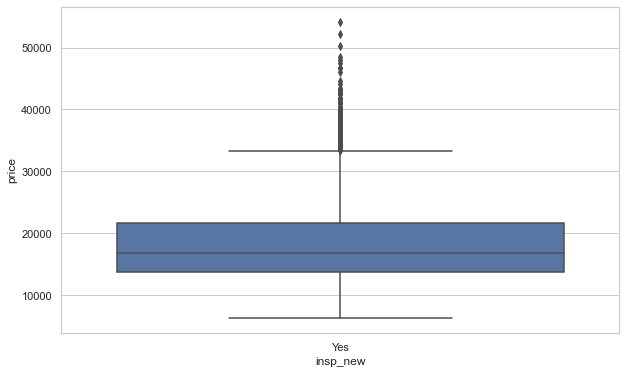

In [697]:
sns.boxplot(x= "insp_new", y="price", data=df);

In [698]:
df.groupby("age").insp_new.apply(lambda x: x.mode()[0])

age
0.0    Yes
1.0    Yes
2.0    Yes
3.0    Yes
Name: insp_new, dtype: object

In [699]:
df.groupby(["make_model", "body_type", "age", "insp_new"]).price.describe()

count          mean          std  \
make_model     body_type     age insp_new                                     
Audi A1        Compact       0.0 Yes       134.0  22505.365672  3094.130848   
                             1.0 Yes       117.0  18002.931624  2303.340362   
                             2.0 Yes        46.0  17045.652174  2278.592043   
                             3.0 Yes       106.0  14275.811321  1923.911230   
               Other         0.0 Yes         1.0  21850.000000          NaN   
               Sedans        0.0 Yes        64.0  23631.671875  3761.063582   
                             1.0 Yes       145.0  17822.213793  2368.766865   
                             2.0 Yes        51.0  16227.490196  2140.541720   
                             3.0 Yes       113.0  14646.141593  1881.027079   
               Station wagon 1.0 Yes         5.0  16676.000000  1670.053891   
                             2.0 Yes         2.0  17700.000000  4171.930009   
                             3.0 Yes         4.0  14447.750000  1456.102646   
Audi A3        Compact       0.0 Yes         1.0  24900.000000          NaN   
                             3.0 Yes         3.0  16613.333333  1572.270121   
               Other         2.0 Yes         1.0  17650.000000          NaN   
               Sedans        0.0 Yes       152.0  24455.250000  1741.961364   
                             1.0 Yes        78.0  21495.115385  1289.065513   
                             2.0 Yes        91.0  19222.560440  1883.719985   
                             3.0 Yes       117.0  16062.017094  1687.634991   
               Station wagon 0.0 Yes        26.0  23915.538462  1589.687019   
                             1.0 Yes         6.0  21636.666667  1167.127528   
                             2.0 Yes        10.0  19525.000000  1995.084237   
                             3.0 Yes        34.0  15552.882353  1895.290491   
Opel Astra     Compact       0.0 Yes         4.0  22604.500000  6174.878703   
                             2.0 Yes         1.0  11980.000000          NaN   
                             3.0 Yes         6.0  13984.666667  1871.167087   
               Other         0.0 Yes         1.0  18749.000000          NaN   
                             1.0 Yes         1.0  14890.000000          NaN   
                             3.0 Yes         1.0   9900.000000          NaN   
               Sedans        0.0 Yes       134.0  21449.179104  4342.433957   
                             1.0 Yes       101.0  16349.415842  1717.428737   
                             2.0 Yes        63.0  12667.206349  1701.160772   
                             3.0 Yes        44.0  12840.545455  2265.052137   
               Station wagon 0.0 Yes       104.0  22684.442308  4674.537235   
                             1.0 Yes       122.0  17898.196721  1111.256252   
                             2.0 Yes        90.0  12731.522222  1732.731086   
                             3.0 Yes       126.0  11424.134921  2435.542280   
               Coupe         3.0 Yes         1.0  14490.000000          NaN   
Opel Corsa     Compact       0.0 Yes       284.0  13571.718310  2564.880743   
                             1.0 Yes       120.0  13002.291667  1476.372334   
                             2.0 Yes        45.0  10224.822222  1866.753785   
                             3.0 Yes        97.0   8208.762887  1681.276318   
               Other         0.0 Yes         1.0  13950.000000          NaN   
                             1.0 Yes         5.0  12643.000000  1603.486826   
                             3.0 Yes         1.0   9470.000000          NaN   
               Sedans        0.0 Yes        33.0  14165.393939  2677.390765   
                             1.0 Yes        31.0  13167.354839   958.357364   
                             2.0 Yes        19.0  10690.526316  2070.320624   
                             3.0 Yes        32.0   8419.750000  1630.414157   
              

 1 year old and under Yes, the rest decided to fill with No.

In [700]:
df[(df.age <= 1) & (df.insp_new.isnull())]["insp_new"] = "Yes"

In [701]:
df[(df.age <= 1)][["insp_new"]].fillna("Yes")

,insp_new
10,Yes
16,Yes
19,Yes
23,Yes
24,Yes
...,...
15914,Yes
15915,Yes
15916,Yes
15917,Yes


In [702]:
df.insp_new.value_counts(dropna=False)

NaN    11987
Yes     3932
Name: insp_new, dtype: int64

In [703]:
# 1st method:

df.loc[(df.age <= 1)&(pd.isnull(df.insp_new)), "insp_new"]="Yes"

In [704]:
# 2nd method

df.loc[(df.age <= 1)&(pd.isnull(df.insp_new)), "insp_new"] = df.loc[(df.age <= 1)&(pd.isnull(df.insp_new)), "insp_new"].fillna("Yes")

In [705]:
df.insp_new.value_counts(dropna=False)

Yes    10441
NaN     5478
Name: insp_new, dtype: int64

In [706]:
# age > 1 olanlara No atama

df.loc[(df.age > 1)&(pd.isnull(df.insp_new)), "insp_new"]="No"

# veya df.insp_new.fillna("No", inplace=True)

In [707]:
null_check("insp_new")

Column name : insp_new
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 Yes    10441
No      5478
Name: insp_new, dtype: int64


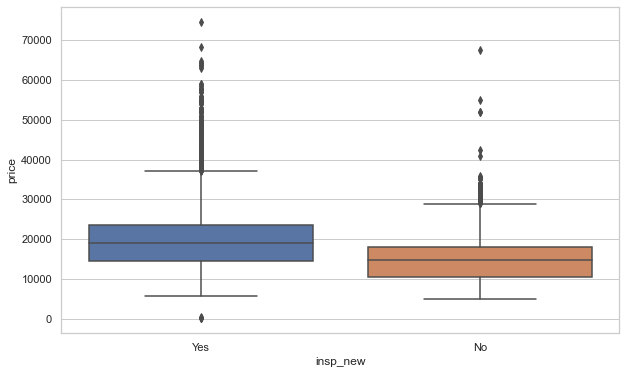

In [708]:
sns.boxplot(x= "insp_new", y="price", data=df);

In [709]:
# The insp_new column hasn't an important effect on price when it is filled, so we will drop it.
df.drop("insp_new", axis = 1 , inplace = True)

### next_insp_date

In [710]:
# null_check("next_insp_date")

In [711]:
df.next_insp_date.isnull().sum()/df.shape[0]

0.7779383127080847

In [712]:
df.drop(columns="next_insp_date", inplace=True)

In [713]:
df.shape

(15919, 39)

### warranty_month column

In [714]:
null_check("warranty_month")

Column name : warranty_month
------------------------------------------------------------
Number of nulls : 11066
Percent of nulls : % 69.51
Value_counts : 
 NaN     11066
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
50.0        4
26.0        4
16.0        4
4.0         3
1.0         3
19.0        3
34.0        3
13.0        3
28.0        2
22.0        2
14.0        2
11.0        2
46.0        2
21.0        2
9.0         2
17.0        2
45.0        2
33.0        1
40.0        1
65.0        1
10.0        1
15.0        1
7.0         1
8.0         1
56.0        1
49.0        1
47.0        1
30.0        1
Name: warranty_month, dtype: int64


> There are too many nan values and when we analyzed these nan values according to the km, age and make_model columns, we decided that this column does not have healthy data.

In [715]:
df.groupby(['make_model', 'age', 'warranty_month']).price.describe()

count          mean          std      min  \
make_model     age warranty_month                                              
Audi A1        0.0 12.0             38.0  23846.342105  2978.849554  17900.0   
                   18.0              1.0  19995.000000          NaN  19995.0   
                   24.0            108.0  23709.212963  3375.037335  14900.0   
                   36.0             26.0  25514.423077  3205.835906  19900.0   
                   48.0             18.0  24441.666667  2516.781909  19650.0   
...                                  ...           ...          ...      ...   
Renault Espace 3.0 21.0              1.0  25990.000000          NaN  25990.0   
                   24.0              4.0  24906.250000   827.177681  23890.0   
                   40.0              1.0  22500.000000          NaN  22500.0   
                   48.0              1.0  19490.000000          NaN  19490.0   
                   60.0              1.0  23890.000000          NaN  23890.0   

                                        25%      50%       75%      max  
make_model     age warranty_month                                        
Audi A1        0.0 12.0            21000.00  23650.0  25725.00  28990.0  
                   18.0            19995.00  19995.0  19995.00  19995.0  
                   24.0            21872.50  22875.0  26890.00  32000.0  
                   36.0            22489.25  26400.0  28677.50  29179.0  
                   48.0            22800.00  25300.0  26200.00  28500.0  
...                                     ...      ...       ...      ...  
Renault Espace 3.0 21.0            25990.00  25990.0  25990.00  25990.0  
                   24.0            24535.00  24925.0  25296.25  25885.0  
                   40.0            22500.00  22500.0  22500.00  22500.0  
                   48.0            19490.00  19490.0  19490.00  19490.0  
                   60.0            23890.00  23890.0  23890.00  23890.0  

[229 rows x 8 columns]

In [716]:
df.groupby(["make_model", "age"]).warranty_month.value_counts(dropna=False).head(50)

make_model  age  warranty_month
Audi A1     0.0  NaN               598
                 24.0              108
                 12.0               38
                 36.0               26
                 48.0               18
                 60.0               14
                 18.0                1
                 56.0                1
            1.0  NaN               512
                 24.0               87
                 12.0               64
                 36.0               26
                 48.0               26
                 60.0               11
                 6.0                 9
                 50.0                3
                 13.0                1
                 20.0                1
                 23.0                1
                 26.0                1
                 46.0                1
                 47.0                1
                 49.0                1
            2.0  NaN               305
                 12.0           

In [717]:
# Fill null value of Audi A2 in make_model column wit 12 months because its age is 1

df.loc[df.make_model == "Audi A2", "warranty_month"] = 12

In [718]:
df.groupby(["make_model","age"]).warranty_month.apply(lambda x: x.mode()[0])

make_model      age
Audi A1         0.0    24.0
                1.0    24.0
                2.0    12.0
                3.0    12.0
Audi A2         1.0    12.0
Audi A3         0.0    24.0
                1.0    12.0
                2.0    12.0
                3.0    12.0
Opel Astra      0.0    24.0
                1.0    12.0
                2.0    12.0
                3.0    12.0
Opel Corsa      0.0    24.0
                1.0    12.0
                2.0    12.0
                3.0    12.0
Opel Insignia   0.0    24.0
                1.0    12.0
                2.0    12.0
                3.0    12.0
Renault Clio    0.0    24.0
                1.0    12.0
                2.0    12.0
                3.0    12.0
Renault Duster  0.0    12.0
Renault Espace  0.0    24.0
                1.0    12.0
                2.0    12.0
                3.0    12.0
Name: warranty_month, dtype: float64

In [719]:
df["warranty_month"]=df.groupby(["make_model","age"]).warranty_month.apply(lambda x: x.fillna(x.mode()[0]))

In [720]:
null_check("warranty_month")

Column name : warranty_month
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 12.0    9892
24.0    4886
60.0     401
36.0     279
48.0     149
6.0      125
72.0      59
3.0       33
23.0      11
18.0      10
20.0       7
25.0       6
2.0        5
50.0       4
26.0       4
16.0       4
4.0        3
1.0        3
19.0       3
34.0       3
13.0       3
28.0       2
22.0       2
14.0       2
11.0       2
46.0       2
21.0       2
9.0        2
17.0       2
45.0       2
33.0       1
40.0       1
65.0       1
10.0       1
15.0       1
7.0        1
8.0        1
56.0       1
49.0       1
47.0       1
30.0       1
Name: warranty_month, dtype: int64


In [721]:
df.warranty_month.size

15919

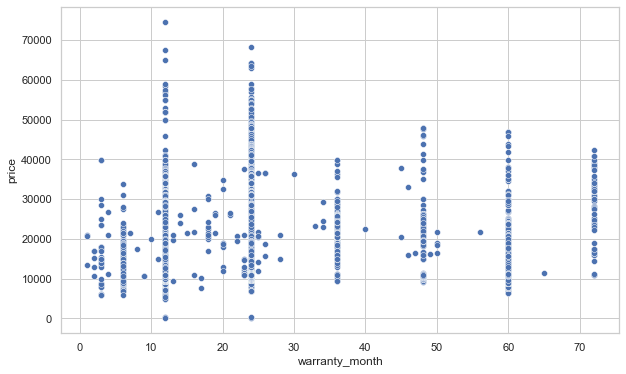

In [722]:
sns.scatterplot(y= "price", x="warranty_month", data=df);

In [723]:
# This column has meaningful effect on price feature. So we will drop it.
df.drop("warranty_month", axis = 1, inplace= True)

In [724]:
df.shape

(15919, 38)

### body_color

In [725]:
null_check("body_color")

Column name : body_color
------------------------------------------------------------
Number of nulls : 597
Percent of nulls : % 3.75
Value_counts : 
 Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64


In [726]:
df.groupby("body_color").price.describe()

,count,mean,std,min,25%,50%,75%,max
body_color,,,,,,,,
Beige,108.0,16785.490741,6574.539417,6499.0,10989.75,16605.0,21357.50,36771.0
Black,3745.0,18920.888117,7568.720813,6200.0,13990.00,17444.0,22490.00,74600.0
Blue,1431.0,17140.855346,6907.153350,5990.0,12465.00,15950.0,20750.00,58990.0
Bronze,6.0,17458.166667,5911.970921,5950.0,17550.00,19700.0,19974.25,22500.0
Brown,289.0,18663.297578,6395.825700,7000.0,14990.00,17450.0,20750.00,47990.0
Gold,2.0,134.000000,171.119841,13.0,73.50,134.0,194.50,255.0
Green,154.0,17820.694805,5685.701211,6290.0,13768.75,17725.0,21567.50,38450.0
Grey,3505.0,18843.907846,7797.394536,120.0,13400.00,17950.0,22865.00,64900.0
Orange,3.0,18166.666667,17347.438091,5555.0,8275.00,10995.0,24472.50,37950.0


In [727]:
# df["body_color"].fillna("-", inplace = True)

In [728]:
df.groupby(["make_model", "body_type", 'body_color']).price.describe().head(50)

count          mean          std  \
make_model body_type     body_color                                     
Audi A1    Compact       Beige         6.0  20556.500000  2475.511563   
                         Black       320.0  18196.281250  4206.972661   
                         Blue         96.0  19145.406250  4541.862986   
                         Brown         9.0  16982.000000  2964.387753   
                         Green        17.0  23558.117647  3849.697097   
                         Grey        126.0  20292.626984  4626.229348   
                         Red          89.0  19306.887640  4779.498448   
                         Silver       42.0  17745.000000  3369.815295   
                         White       274.0  19193.102190  4644.279501   
                         Yellow       16.0  26756.250000  3176.864020   
           Coupe         Black         2.0  14925.000000  1378.858223   
           Other         Black         4.0  21342.500000  2998.948427   
                         Blue          1.0  25900.000000          NaN   
                         Grey          3.0  25096.666667  2312.149072   
                         White         5.0  19956.000000  2982.177057   
           Sedans        Beige        11.0  16891.636364  2557.482640   
                         Black       384.0  17382.570312  4247.650581   
                         Blue        184.0  18705.097826  4435.479028   
                         Brown        13.0  15037.615385  1645.795326   
                         Green        15.0  22574.666667  1817.576356   
                         Grey        197.0  19536.324873  4777.976143   
                         Red         161.0  18666.515528  4383.287662   
                         Silver       87.0  18043.413793  2847.860174   
                         Violet        2.0  13700.000000     0.000000   
                         White       440.0  19104.990909  4456.787354   
                         Yellow       15.0  24697.800000  5521.157076   
           Station wagon Black         6.0  20393.166667  6628.515985   
                         Blue          5.0  18386.000000  2509.766921   
                         Grey          1.0  19640.000000          NaN   
                         Silver        1.0  14440.000000          NaN   
                         White         8.0  15708.750000  2498.382720   
           Van           Black         1.0  29000.000000          NaN   
Audi A2    Off-Road      Grey          1.0  28200.000000          NaN   
Audi A3    Compact       Black        59.0  16974.949153  3987.638349   
                         Blue         23.0  17452.608696  4825.686213   
                         Brown         2.0  15925.000000  3995.153314   
                         Grey         41.0  22170.341463  7749.242839   
                         Red          18.0  15355.555556  2814.922885   
                         Silver        5.0  26175.800000  9958.760249   
                         White        29.0  20485.827586  9493.781397   
           Convertible   Black         1.0  20900.000000          NaN   
                         Blue          1.0  56100.000000          NaN   
                         Grey          1.0  32950.000000          NaN   
                         Red           2.0  16446.500000  7853.835019   
                         White         3.0  26800.000000  5930.430001   
           Coupe         Silver        4.0  17745.000000   962.652585   
           Other         Black         4.0  22372.500000  3469.153355   
                         Blue          4.0  20572.500000  5293.520410   
                         Grey          4.0  22645.000000  3754.379665   
                         White         3.0  17100.000000  2946.183973   

                                         min       25%      50%       75%  \
make_model body_type     body_color                                         
Audi A1    Compact       Beige       16240.0  19766.75  21420.0  21700.00   
         

In [729]:
# "make_model","body_type"' göre gruplayıp mode'ad göre doldurma

df["body_color"] = df.groupby(["make_model","body_type"]).body_color.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.body_color.mode()[0]))

In [730]:
null_check("body_color")

Column name : body_color
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 Black     3944
Grey      3836
White     3469
Silver    1647
Blue      1431
Red        957
Brown      289
Green      158
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64


In [731]:
df.shape

(15919, 38)

In [732]:
df["body_color"].size

15919

### paint_type

In [733]:
null_check("paint_type")

Column name : paint_type
------------------------------------------------------------
Number of nulls : 5772
Percent of nulls : % 36.26
Value_counts : 
 Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64


In [734]:
df.groupby("paint_type").price.describe()

,count,mean,std,min,25%,50%,75%,max
paint_type,,,,,,,,
Metallic,9794.0,18593.333163,7339.428432,120.0,13852.5,17450.0,22150.0,68320.0
Perl effect,6.0,15428.333333,7520.285677,8500.0,9567.5,14400.0,17867.5,28290.0
Uni/basic,347.0,17760.184438,6694.966375,6899.0,11349.5,17777.0,22500.0,37599.0


In [735]:
df.groupby(["make_model", "body_type", "age", 'paint_type']).price.describe()

count          mean          std  \
make_model     body_type age paint_type                                     
Audi A1        Compact   0.0 Metallic    229.0  24622.257642  3172.063399   
                             Uni/basic     2.0  19888.000000     0.000000   
                         1.0 Metallic    212.0  18861.650943  2674.019324   
                         2.0 Metallic    108.0  17001.351852  2294.777436   
                             Uni/basic     1.0  17900.000000          NaN   
...                                        ...           ...          ...   
Renault Espace Van       1.0 Uni/basic     6.0  29056.666667  3244.174266   
                         2.0 Metallic     91.0  27069.626374  3698.379353   
                             Uni/basic     2.0  26700.000000  3535.533906   
                         3.0 Metallic    134.0  22325.567164  3269.416219   
                             Uni/basic     3.0  22628.333333  2094.721541   

                                             min       25%      50%      75%  \
make_model     body_type age paint_type                                        
Audi A1        Compact   0.0 Metallic    17880.0  21990.00  23700.0  27780.0   
                             Uni/basic   19888.0  19888.00  19888.0  19888.0   
                         1.0 Metallic    13980.0  16448.75  17515.0  21482.5   
                         2.0 Metallic    10999.0  15450.00  15954.5  18957.5   
                             Uni/basic   17900.0  17900.00  17900.0  17900.0   
...                                          ...       ...      ...      ...   
Renault Espace Van       1.0 Uni/basic   24750.0  26900.00  29400.0  31900.0   
                         2.0 Metallic    16950.0  25490.00  25490.0  28700.0   
                             Uni/basic   24200.0  25450.00  26700.0  27950.0   
                         3.0 Metallic    12614.0  19900.00  21990.0  24900.0   
                             Uni/basic   20995.0  21447.50  21900.0  23445.0   

                                             max  
make_model     body_type age paint_type           
Audi A1        Compact   0.0 Metallic    31990.0  
                             Uni/basic   19888.0  
                         1.0 Metallic    23829.0  
                         2.0 Metallic    22150.0  
                             Uni/basic   17900.0  
...                                          ...  
Renault Espace Van       1.0 Uni/basic   31990.0  
                         2.0 Metallic    41900.0  
                             Uni/basic   29200.0  
                         3.0 Metallic    27900.0  
                             Uni/basic   24990.0  

[190 rows x 8 columns]

In [736]:
df[["make_model", "body_type", 'paint_type']]

,make_model,body_type,paint_type
0,Audi A1,Sedans,Metallic
1,Audi A1,Sedans,NaN
2,Audi A1,Sedans,Metallic
3,Audi A1,Sedans,Metallic
4,Audi A1,Sedans,Metallic
...,...,...,...
15914,Renault Espace,Van,Metallic
15915,Renault Espace,Van,Metallic
15916,Renault Espace,Van,NaN
15917,Renault Espace,Van,NaN


In [737]:
df.groupby("body_color").paint_type.apply(lambda x:x.mode()[0] if any(x.mode()) else x )

body_color
Beige                                              Metallic
Black                                              Metallic
Blue                                               Metallic
Bronze                                             Metallic
Brown                                              Metallic
Gold      6066    NaN
8594    NaN
Name: Gold, dtype: object
Green                                              Metallic
Grey                                               Metallic
Orange                                             Metallic
Red                                                Metallic
Silver                                             Metallic
Violet                                             Metallic
White                                              Metallic
Yellow                                             Metallic
Name: paint_type, dtype: object

In [738]:
# son durum
df["paint_type"]=df.groupby(["make_model","body_type","body_color"]).paint_type.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.paint_type.mode()[0]))

In [739]:
null_check("paint_type")

Column name : paint_type
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 Metallic       15359
Uni/basic        554
Perl effect        6
Name: paint_type, dtype: int64


In [740]:
df.shape

(15919, 38)

In [741]:
df.paint_type.size

15919

In [742]:
# df["paint_type"] = df.groupby(["make_model", "body_type", "body_color"]).paint_type.fillna(method="ffill").fillna(method="bfill")

### nr_of_doors

In [743]:
null_check("nr_of_doors")

Column name : nr_of_doors
------------------------------------------------------------
Number of nulls : 212
Percent of nulls : % 1.33
Value_counts : 
 5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64


In [744]:
df[df.nr_of_doors==1]

,make_model,short_description,body_type,price,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country,age
13782,Renault Clio,Business Energy dCi 75 eco2 Euro 6,Compact,8500.0,41493.0,1.0,Used,NaN,NaN,NaN,12 months,NaN,NaN,White,Metallic,1.0,NaN,Manual,1461.0,NaN,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [745]:
df.groupby(["make_model","body_type"]).nr_of_doors.value_counts(dropna=False).head(50)

make_model  body_type      nr_of_doors
Audi A1     Compact        5.0             666
                           4.0             207
                           3.0              80
                           2.0              69
                           NaN              17
            Coupe          2.0               1
                           5.0               1
            Other          5.0               8
                           4.0               5
            Sedans         5.0            1048
                           4.0             321
                           3.0             130
                           2.0              29
                           NaN              10
            Station wagon  5.0              17
                           4.0               3
                           3.0               1
            Van            5.0               1
Audi A2     Off-Road       5.0               1
Audi A3     Compact        5.0             164
                     

In [746]:
df.groupby("nr_of_doors").price.describe()

,count,mean,std,min,25%,50%,75%,max
nr_of_doors,,,,,,,,
1.0,1.0,8500.000000,NaN,8500.0,8500.0,8500.0,8500.0,8500.0
2.0,219.0,13208.086758,5145.006856,5300.0,9900.0,12990.0,15850.0,56100.0
3.0,832.0,12586.966346,4035.291868,13.0,9732.5,11420.0,15410.0,23600.0
4.0,3079.0,18090.070477,6391.061105,5890.0,13900.0,17350.0,21490.0,74600.0
5.0,11575.0,18544.102203,7650.323873,120.0,12990.0,17450.0,22720.0,68320.0
7.0,1.0,21600.000000,NaN,21600.0,21600.0,21600.0,21600.0,21600.0


In [747]:
df.groupby(["make_model","body_type","nr_of_doors"]).price.describe().head(50)

count          mean           std  \
make_model body_type     nr_of_doors                                       
Audi A1    Compact       2.0            69.0  15201.608696   2121.071304   
                         3.0            80.0  15190.012500   2353.692184   
                         4.0           207.0  19018.077295   4481.634702   
                         5.0           666.0  20055.171171   4463.177340   
           Coupe         2.0             1.0  13950.000000           NaN   
                         5.0             1.0  15900.000000           NaN   
           Other         4.0             5.0  22382.000000    536.954374   
                         5.0             8.0  21803.750000   4434.484790   
           Sedans        2.0            29.0  15110.827586   1886.382140   
                         3.0           130.0  15369.500000   2553.093728   
                         4.0           321.0  19161.411215   4351.644162   
                         5.0          1048.0  18972.936069   4522.954554   
           Station wagon 3.0             1.0  16500.000000           NaN   
                         4.0             3.0  15430.333333   1284.730452   
                         5.0            17.0  18308.705882   4704.152511   
           Van           5.0             1.0  29000.000000           NaN   
Audi A2    Off-Road      5.0             1.0  28200.000000           NaN   
Audi A3    Compact       3.0            11.0  18346.727273   2744.114032   
                         4.0             6.0  19426.166667   3987.203953   
                         5.0           164.0  19079.835366   7097.992615   
           Convertible   2.0             7.0  28906.142857  14210.760505   
                         5.0             1.0  20900.000000           NaN   
           Coupe         3.0             4.0  17745.000000    962.652585   
           Other         2.0             2.0  19550.000000    919.238816   
                         3.0             3.0  16933.333333   1241.303079   
                         4.0             1.0  28490.000000           NaN   
                         5.0            10.0  20782.000000   4733.069946   
           Sedans        2.0            17.0  15576.117647   2425.100897   
                         3.0            94.0  18503.819149   2450.529172   
                         4.0           517.0  20398.361702   4658.847047   
                         5.0          1953.0  21573.252944   4884.049433   
           Station wagon 2.0             1.0  15950.000000           NaN   
                         3.0             1.0  17990.000000           NaN   
                         4.0           110.0  19633.645455   4196.012720   
                         5.0           169.0  21428.680473   4870.577966   
Opel Astra Compact       4.0             5.0   9849.800000   2055.401469   
                         5.0           180.0  16376.150000   6041.218803   
           Coupe         3.0             1.0  14490.000000           NaN   
                         5.0             1.0  29990.000000           NaN   
           Off-Road      5.0             1.0  18590.000000           NaN   
           Other         4.0             7.0  14015.428571   4225.551950   
                         5.0            59.0  13827.305085   2206.155779   
           Sedans        3.0             3.0  12526.666667   2060.129446   
                         4.0           241.0  15251.112033   3481.481601   
                         5.0           797.0  16233.474279   4627.793960   
           Station wagon 4.0           280.0  14690.571429   4942.989415   
                         5.0           927.0  16108.920173   5332.608934   
Opel Corsa Compact       2.0            88.0   9371.806818   2080.754841   
                         3.0           338.0  10635.884615   2451.229359   
                         4.0           268.0  12041.708955   2954.261736   

                                          min       25%      50%       75%  \
make_mod

In [748]:
# 
df["nr_of_doors"]=df.groupby(["make_model","body_type"]).nr_of_doors.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.nr_of_doors.mode()[0]))

In [749]:
null_check("nr_of_doors")

Column name : nr_of_doors
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 5.0    11787
4.0     3079
3.0      832
2.0      219
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64


In [750]:
df.groupby(["make_model","body_type","nr_of_doors"]).price.describe().head(50)

count          mean           std  \
make_model body_type     nr_of_doors                                       
Audi A1    Compact       2.0            69.0  15201.608696   2121.071304   
                         3.0            80.0  15190.012500   2353.692184   
                         4.0           207.0  19018.077295   4481.634702   
                         5.0           683.0  20112.598829   4483.472963   
           Coupe         2.0             1.0  13950.000000           NaN   
                         5.0             1.0  15900.000000           NaN   
           Other         4.0             5.0  22382.000000    536.954374   
                         5.0             8.0  21803.750000   4434.484790   
           Sedans        2.0            29.0  15110.827586   1886.382140   
                         3.0           130.0  15369.500000   2553.093728   
                         4.0           321.0  19161.411215   4351.644162   
                         5.0          1058.0  18968.097353   4512.990138   
           Station wagon 3.0             1.0  16500.000000           NaN   
                         4.0             3.0  15430.333333   1284.730452   
                         5.0            17.0  18308.705882   4704.152511   
           Van           5.0             1.0  29000.000000           NaN   
Audi A2    Off-Road      5.0             1.0  28200.000000           NaN   
Audi A3    Compact       3.0            11.0  18346.727273   2744.114032   
                         4.0             6.0  19426.166667   3987.203953   
                         5.0           165.0  19055.048485   7083.478606   
           Convertible   2.0             7.0  28906.142857  14210.760505   
                         5.0             1.0  20900.000000           NaN   
           Coupe         3.0             4.0  17745.000000    962.652585   
           Other         2.0             2.0  19550.000000    919.238816   
                         3.0             3.0  16933.333333   1241.303079   
                         4.0             1.0  28490.000000           NaN   
                         5.0            10.0  20782.000000   4733.069946   
           Sedans        2.0            17.0  15576.117647   2425.100897   
                         3.0            94.0  18503.819149   2450.529172   
                         4.0           517.0  20398.361702   4658.847047   
                         5.0          1977.0  21527.960546   4884.048458   
           Station wagon 2.0             1.0  15950.000000           NaN   
                         3.0             1.0  17990.000000           NaN   
                         4.0           110.0  19633.645455   4196.012720   
                         5.0           170.0  21407.923529   4863.682180   
Opel Astra Compact       4.0             5.0   9849.800000   2055.401469   
                         5.0           180.0  16376.150000   6041.218803   
           Coupe         3.0             1.0  14490.000000           NaN   
                         5.0             1.0  29990.000000           NaN   
           Off-Road      5.0             1.0  18590.000000           NaN   
           Other         4.0             7.0  14015.428571   4225.551950   
                         5.0            60.0  13846.683333   2192.523818   
           Sedans        3.0             3.0  12526.666667   2060.129446   
                         4.0           241.0  15251.112033   3481.481601   
                         5.0           809.0  16188.045735   4618.959876   
           Station wagon 4.0           280.0  14690.571429   4942.989415   
                         5.0           938.0  16084.050107   5334.889446   
Opel Corsa Compact       2.0            88.0   9371.806818   2080.754841   
                         3.0           338.0  10635.884615   2451.229359   
                         4.0           268.0  12041.708955   2954.261736   

                                          min       25%      50%       75%  \
make_mod

In [751]:
df.shape

(15919, 38)

In [752]:
df.nr_of_doors.size

15919

### nr_of_seats

In [753]:
null_check("nr_of_seats")

Column name : nr_of_seats
------------------------------------------------------------
Number of nulls : 977
Percent of nulls : % 6.14
Value_counts : 
 5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64


In [754]:
df.groupby(["make_model","body_type"]).nr_of_seats.value_counts(dropna=False).head(50)

make_model  body_type      nr_of_seats
Audi A1     Compact        5.0             538
                           4.0             431
                           NaN              68
                           3.0               1
                           6.0               1
            Coupe          4.0               1
                           5.0               1
            Other          5.0              12
                           4.0               1
            Sedans         5.0             827
                           4.0             641
                           NaN              70
            Station wagon  5.0              14
                           4.0               6
                           NaN               1
            Van            NaN               1
Audi A2     Off-Road       5.0               1
Audi A3     Compact        5.0             175
                           NaN               7
            Convertible    4.0               5
                     

In [755]:
df.groupby("nr_of_seats").price.describe()

,count,mean,std,min,25%,50%,75%,max
nr_of_seats,,,,,,,,
2.0,116.0,8474.181034,1703.621032,5250.0,7800.0,8045.0,9500.0,20450.0
3.0,1.0,23090.000000,NaN,23090.0,23090.0,23090.0,23090.0,23090.0
4.0,1125.0,17163.024889,4062.833196,8000.0,14490.0,16000.0,19350.0,68320.0
5.0,13336.0,17821.500825,7138.996349,13.0,12500.0,16900.0,21900.0,74600.0
6.0,2.0,27995.000000,20499.025587,13500.0,20747.5,27995.0,35242.5,42490.0
7.0,362.0,31115.555249,8564.231584,13500.0,25050.0,29849.5,35500.0,64332.0


In [756]:
df.groupby(["make_model","body_type","nr_of_seats"]).price.describe().head(50)

count          mean           std  \
make_model    body_type     nr_of_seats                                       
Audi A1       Compact       3.0             1.0  23090.000000           NaN   
                            4.0           431.0  17295.649652   3633.456212   
                            5.0           538.0  20300.241636   4549.676833   
                            6.0             1.0  13500.000000           NaN   
              Coupe         4.0             1.0  13950.000000           NaN   
                            5.0             1.0  15900.000000           NaN   
              Other         4.0             1.0  16900.000000           NaN   
                            5.0            12.0  22453.333333   3181.872900   
              Sedans        4.0           641.0  16965.970359   3524.681298   
                            5.0           827.0  19912.288996   4674.192337   
              Station wagon 4.0             6.0  16035.000000   2218.096030   
                            5.0            14.0  18846.428571   4860.197902   
Audi A2       Off-Road      5.0             1.0  28200.000000           NaN   
Audi A3       Compact       5.0           175.0  19137.508571   6910.576336   
              Convertible   4.0             5.0  22658.600000   8072.432706   
                            5.0             2.0  38500.000000  24890.158698   
              Coupe         5.0             4.0  17745.000000    962.652585   
              Other         4.0             1.0  20200.000000           NaN   
                            5.0             9.0  20165.555556   3919.955711   
              Sedans        4.0            19.0  21063.684211   1704.853237   
                            5.0          2484.0  21207.625201   4889.598433   
              Station wagon 5.0           277.0  20651.779783   4688.751280   
Opel Astra    Compact       5.0           174.0  15787.471264   5613.182936   
              Coupe         4.0             1.0  14490.000000           NaN   
              Off-Road      5.0             1.0  18590.000000           NaN   
              Other         5.0            61.0  13755.065574   2433.934324   
              Sedans        5.0           985.0  15897.777665   4433.858478   
              Station wagon 4.0             4.0   9187.500000   1162.163930   
                            5.0          1136.0  15706.227113   5288.403836   
Opel Corsa    Compact       4.0             5.0  12303.800000   1982.506545   
                            5.0          1200.0  11797.881667   3096.722761   
              Coupe         2.0             1.0   7200.000000           NaN   
                            5.0            11.0   9030.909091   1584.048323   
              Off-Road      5.0             1.0   8700.000000           NaN   
              Other         5.0            86.0   9711.976744   2041.294214   
              Sedans        4.0             1.0   8200.000000           NaN   
                            5.0           787.0  10247.233799   2656.825467   
              Transporter   2.0             4.0   5937.500000   1018.475167   
                            4.0             1.0   9700.000000           NaN   
                            5.0             2.0  10050.000000    636.396103   
Opel Insignia Compact       5.0            26.0  28286.230769  11398.097133   
              Off-Road      5.0             7.0  29451.285714   7618.618241   
              Other         5.0            44.0  18583.954545   5299.817346   
              Sedans        5.0           857.0  21261.710618   7416.454844   
              Station wagon 2.0             1.0   9500.000000           NaN   
                            4.0             2.0  27135.000000  18165.573209   
                            5.0          1552.0  21517.992912   7743.697951   
              Van           5.0             1.0  20980.000000           NaN   
Renault Clio  Compact       2.0             8.0   9491.375000   1435.780319   
             

In [757]:
df["nr_of_seats"] = df.groupby(["make_model", "body_type"]).nr_of_seats.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.nr_of_seats.mode()[0]))

In [758]:
# # bfill ve ffill ile doldurulunca da aynı sonuç elde ediliyor.

# df["nr_of_seats"] = df.groupby(["make_model", "body_type"]).nr_of_seats.fillna(method="ffill").fillna(method="bfill")

In [759]:
null_check("nr_of_seats")

Column name : nr_of_seats
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 5.0    14308
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64


In [760]:
df.nr_of_seats.size

15919

In [761]:
df.groupby(["make_model","body_type","nr_of_seats"]).price.describe().head(50)

count          mean           std  \
make_model    body_type     nr_of_seats                                       
Audi A1       Compact       3.0             1.0  23090.000000           NaN   
                            4.0           431.0  17295.649652   3633.456212   
                            5.0           606.0  20539.181518   4667.666146   
                            6.0             1.0  13500.000000           NaN   
              Coupe         4.0             1.0  13950.000000           NaN   
                            5.0             1.0  15900.000000           NaN   
              Other         4.0             1.0  16900.000000           NaN   
                            5.0            12.0  22453.333333   3181.872900   
              Sedans        4.0           641.0  16965.970359   3524.681298   
                            5.0           897.0  19821.763657   4662.867877   
              Station wagon 4.0             6.0  16035.000000   2218.096030   
                            5.0            15.0  18521.933333   4849.095725   
              Van           5.0             1.0  29000.000000           NaN   
Audi A2       Off-Road      5.0             1.0  28200.000000           NaN   
Audi A3       Compact       5.0           182.0  19024.472527   6808.256065   
              Convertible   4.0             6.0  24373.833333   8353.651188   
                            5.0             2.0  38500.000000  24890.158698   
              Coupe         5.0             4.0  17745.000000    962.652585   
              Other         4.0             1.0  20200.000000           NaN   
                            5.0            15.0  20400.666667   4704.935807   
              Sedans        4.0            19.0  21063.684211   1704.853237   
                            5.0          2586.0  21156.486466   4845.622692   
              Station wagon 5.0           282.0  20684.354610   4680.918592   
Opel Astra    Compact       5.0           185.0  16199.762162   6059.914256   
              Coupe         4.0             2.0  22240.000000  10960.155108   
              Off-Road      5.0             1.0  18590.000000           NaN   
              Other         5.0            67.0  13864.313433   2433.767239   
              Sedans        5.0          1053.0  15963.178538   4398.680098   
              Station wagon 4.0             4.0   9187.500000   1162.163930   
                            5.0          1214.0  15785.378089   5272.926206   
Opel Corsa    Compact       4.0             5.0  12303.800000   1982.506545   
                            5.0          1227.0  11788.766911   3084.592515   
              Coupe         2.0             1.0   7200.000000           NaN   
                            5.0            12.0   8903.333333   1573.660084   
              Off-Road      5.0             3.0   8166.666667    461.880215   
              Other         5.0            87.0   9761.149425   2080.574879   
              Sedans        4.0             1.0   8200.000000           NaN   
                            5.0           874.0  10208.076659   2634.658351   
              Transporter   2.0             4.0   5937.500000   1018.475167   
                            4.0             1.0   9700.000000           NaN   
                            5.0             2.0  10050.000000    636.396103   
              Van           5.0             2.0   7900.000000      0.000000   
Opel Insignia Compact       5.0            27.0  28590.074074  11287.713923   
              Coupe         5.0             1.0  17094.000000           NaN   
              Off-Road      5.0             7.0  29451.285714   7618.618241   
              Other         5.0            48.0  18247.791667   5283.707277   
              Sedans        5.0           900.0  21263.470000   7408.317757   
              Station wagon 2.0             1.0   9500.000000           NaN   
                            4.0             2.0  27135.000000  18165.573209   
             

### displacement_cc

In [762]:
null_check("displacement_cc")

Column name : displacement_cc
------------------------------------------------------------
Number of nulls : 496
Percent of nulls : % 3.12
Value_counts : 
 1598.0     4761
999.0      2438
1398.0     1314
1399.0      749
1229.0      677
1956.0      670
1461.0      595
1490.0      559
NaN         496
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1200.0       18
1984.0       18
1397.0       11
899.0        11
160.0         6
929.0         5
1499.0        5
997.0         4
1596.0        4
139.0         4
900.0         4
1599.0        3
1199.0        3
1396.0        3
1495.0        2
1589.0        2
1300.0        2
2.0           2
995.0         2
1496.0        1
890.0         1
1580.0        1
1995.0      

In [763]:
df["short_description"][df.displacement_cc.isnull()]

142      1.6 TDI METAL PLUS *S-TRONIC* BI-COLOR*NAVI_ X...
191        Sportback Sportback 1.4 TDI S tronic Adrenalin2
404       SPB 1.4TDI SPORT S-TRONIC NAVI XENON PADDLES PDC
412                            SPB 1.6 TDI 116 CV S tronic
505           Sportback Sportback 1.0 TFSI 95CV Attraction
                               ...                        
15791                          V dCi 160 Energy Twin Turbo
15795                         EXECUTIVE Energy dCi 160 EDC
15804                      Initiale Paris Blue dCi 200 EDC
15805    Init. P. Blue dCi 147kW (200CV) EDC - 18 Leomotor
15906                     V Tce 225 EDC FAP Initiale Paris
Name: short_description, Length: 496, dtype: object

In [764]:
df["short_description"][df.displacement_cc.isnull()].str.extract("(\d\.\d)").isnull().sum()

0    179
dtype: int64

In [765]:
df["fill_displacement"]=df["short_description"].str.extract("(\d\.\d)")
df["fill_displacement"]

0        1.4
1        1.8
2        1.6
3        1.4
4        1.4
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: fill_displacement, Length: 15919, dtype: object

In [766]:
df["displacement_cc"].value_counts(dropna=False)

1598.0     4761
999.0      2438
1398.0     1314
1399.0      749
1229.0      677
1956.0      670
1461.0      595
1490.0      559
NaN         496
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1200.0       18
1984.0       18
1397.0       11
899.0        11
160.0         6
929.0         5
1499.0        5
997.0         4
1596.0        4
139.0         4
900.0         4
1599.0        3
1199.0        3
1396.0        3
1495.0        2
1589.0        2
1300.0        2
2.0           2
995.0         2
1496.0        1
890.0         1
1580.0        1
1995.0        1
1333.0        1
54.0          1
1533.0        1
1100.0        1
1350.0        1
16000.0       1
1856.0        1
1568.0        1
1896.0        1
1584.0  

In [767]:
df["fill_displacement"]=df["short_description"].str.extract("(\d\.\d)").astype(float)*1000

In [768]:
df["displacement_cc"]

0        1422.0
1        1798.0
2        1598.0
3        1422.0
4        1422.0
          ...  
15914    1997.0
15915    1798.0
15916    1997.0
15917    1997.0
15918    1798.0
Name: displacement_cc, Length: 15919, dtype: float64

In [769]:
df["displacement_cc"].fillna(df["fill_displacement"],inplace=True)

In [770]:
df["displacement_cc"][404]

1400.0

In [771]:
df["displacement_cc"].isnull().sum()

179

In [772]:
def displacement_category(x):
    if x % 100 >= 50 :
        return x + 100 - x % 100
    elif x % 100 < 50 :
        return x - x % 100
    else :
        return x

In [773]:
df["displacement_cc"] = df["displacement_cc"].apply(displacement_category)
df["displacement_cc"]

0        1400.0
1        1800.0
2        1600.0
3        1400.0
4        1400.0
          ...  
15914    2000.0
15915    1800.0
15916    2000.0
15917    2000.0
15918    1800.0
Name: displacement_cc, Length: 15919, dtype: float64

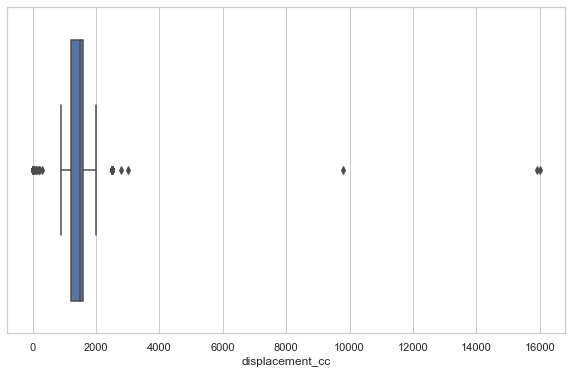

In [774]:
sns.boxplot(df.displacement_cc);

In [775]:
# Kalan nullara bakalım
df.displacement_cc.value_counts(dropna=False)

1600.0     5242
1400.0     3105
1000.0     2574
1500.0     1453
2000.0     1185
1200.0     1183
900.0       377
1100.0      289
1800.0      211
NaN         179
1300.0       39
0.0          38
2500.0       20
100.0         7
200.0         6
1700.0        3
1900.0        2
15900.0       1
2800.0        1
9800.0        1
3000.0        1
16000.0       1
300.0         1
Name: displacement_cc, dtype: int64

In [776]:
# The remaining values are filled as follows.
df["displacement_cc"]=df.groupby(["make_model","body_type"]).displacement_cc.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.displacement_cc.mode()[0]))

In [777]:
df.displacement_cc.isna().sum()

0

In [778]:
df.displacement_cc.size

15919

### cylinders

In [779]:
null_check("cylinders")

Column name : cylinders
------------------------------------------------------------
Number of nulls : 5680
Percent of nulls : % 35.68
Value_counts : 
 4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64


In [780]:
df.groupby(["make_model", "body_type", "displacement_cc"]).cylinders.value_counts(dropna=False).head(50)

make_model  body_type      displacement_cc  cylinders
Audi A1     Compact        300.0            NaN            1
                           900.0            NaN            5
                           1000.0           3.0          386
                                            NaN          286
                                            4.0            4
                                            8.0            1
                           1400.0           NaN          149
                                            3.0           64
                                            4.0           46
                           1500.0           4.0           12
                                            NaN            2
                           1600.0           4.0           41
                                            NaN           30
                                            3.0            1
                           1800.0           4.0            2
                           2000

In [781]:
df.groupby(["make_model","body_type","cylinders"]).price.describe()

count          mean           std  \
make_model     body_type     cylinders                                       
Audi A1        Compact       3.0         451.0  19754.844789   4629.956570   
                             4.0         110.0  19572.354545   4330.521723   
                             8.0           1.0  12990.000000           NaN   
               Coupe         3.0           1.0  13950.000000           NaN   
               Other         3.0           4.0  23822.500000   4844.655991   
                             4.0           3.0  19096.666667   3804.738274   
               Sedans        3.0         892.0  18952.041480   4762.162019   
                             4.0         277.0  17897.613718   3218.422065   
               Station wagon 3.0          10.0  16687.000000   2058.208768   
                             4.0           6.0  17740.166667   2819.292281   
Audi A3        Compact       3.0          17.0  29456.882353   9761.416328   
                             4.0         136.0  17598.191176   3991.801412   
                             5.0           1.0  67600.000000           NaN   
               Convertible   4.0           8.0  27905.375000  13457.660155   
               Coupe         3.0           1.0  19000.000000           NaN   
                             4.0           3.0  17326.666667    583.123772   
               Other         3.0           1.0  28490.000000           NaN   
                             4.0           6.0  19833.333333   2782.564764   
               Sedans        3.0         306.0  22815.901961   2348.790220   
                             4.0        1647.0  20915.227687   3892.162510   
                             5.0          18.0  54182.722222   7976.639155   
               Station wagon 3.0          48.0  21756.562500   2399.415877   
                             4.0         100.0  20409.590000   4012.498975   
                             5.0           2.0  41445.000000  31756.165543   
Opel Astra     Compact       3.0          21.0  16649.428571   2824.153653   
                             4.0         102.0  16147.343137   7657.706893   
               Coupe         4.0           1.0  29990.000000           NaN   
               Off-Road      4.0           1.0  18590.000000           NaN   
               Other         3.0           5.0  11616.000000   2144.872957   
                             4.0          50.0  14288.320000   1940.478559   
               Sedans        3.0         112.0  15168.651786   2173.181525   
                             4.0         421.0  16074.859857   5298.446604   
               Station wagon 3.0          38.0  16374.210526   1901.723303   
                             4.0         669.0  15895.127055   5681.718394   
Opel Corsa     Compact       1.0           1.0  16625.000000           NaN   
                             3.0           3.0   9580.333333   9258.102523   
                             4.0         622.0  12081.501608   3056.920915   
               Coupe         3.0           1.0   7800.000000           NaN   
                             4.0          10.0   8775.000000   1578.897295   
               Off-Road      4.0           3.0   8166.666667    461.880215   
               Other         3.0           1.0    331.000000           NaN   
                             4.0          79.0   9592.835443   1579.948355   
               Sedans        3.0           3.0   9079.666667   1936.693144   
                             4.0         671.0  10208.754098   2607.263226   
               Transporter   3.0           1.0   7450.000000           NaN   
                             4.0           6.0   7683.333333   2486.899006   
Opel Insignia  Compact       4.0          22.0  27785.090909  11535.389018   
               Off-Road      4.0           6.0  28778.166667   8114.558704   
               Other         4.0          46.0  18118.021739   5329.959998   
               Sedans        4.0         586.0  20454.073379   

In [782]:
df.groupby(["make_model","body_type","displacement_cc"]).cylinders.value_counts(dropna=False).head(50)

make_model  body_type      displacement_cc  cylinders
Audi A1     Compact        300.0            NaN            1
                           900.0            NaN            5
                           1000.0           3.0          386
                                            NaN          286
                                            4.0            4
                                            8.0            1
                           1400.0           NaN          149
                                            3.0           64
                                            4.0           46
                           1500.0           4.0           12
                                            NaN            2
                           1600.0           4.0           41
                                            NaN           30
                                            3.0            1
                           1800.0           4.0            2
                           2000

In [783]:
# son durum
df.groupby(["make_model","body_type","displacement_cc"]).cylinders.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.cylinders.mode()[0]))

0        3.0
1        4.0
2        4.0
3        3.0
4        3.0
        ... 
15914    4.0
15915    4.0
15916    4.0
15917    4.0
15918    4.0
Name: cylinders, Length: 15919, dtype: float64

In [784]:
df.cylinders.mode()[0]

4.0

In [785]:
df["cylinders"] = df.groupby(["make_model", "body_type", "displacement_cc"]).cylinders.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.cylinders.mode()[0]))

In [786]:
null_check("cylinders")

Column name : cylinders
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 4.0    12415
3.0     3474
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: cylinders, dtype: int64


In [787]:
df.cylinders.size

15919

### drive_chain

In [788]:
null_check("drive_chain")

Column name : drive_chain
------------------------------------------------------------
Number of nulls : 6858
Percent of nulls : % 43.08
Value_counts : 
 front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64


In [789]:
df.drive_chain.mode()[0]

'front'

In [790]:
df.groupby(["make_model","body_type"]).drive_chain.value_counts(dropna=False).head(50)

make_model  body_type      drive_chain
Audi A1     Compact        front           685
                           NaN             352
                           4WD               2
            Coupe          NaN               2
            Other          front            12
                           NaN               1
            Sedans         front           977
                           NaN             560
                           4WD               1
            Station wagon  front            18
                           NaN               3
            Van            front             1
Audi A2     Off-Road       front             1
Audi A3     Compact        front           156
                           NaN              25
                           4WD               1
            Convertible    NaN               4
                           front             3
                           4WD               1
            Coupe          front             3
                     

In [791]:
df.groupby(["make_model","body_type","drive_chain"]).price.describe()

count          mean           std  \
make_model     body_type     drive_chain                                       
Audi A1        Compact       4WD             2.0  14790.000000   1258.650071   
                             front         685.0  20008.223358   4511.347852   
               Other         front          12.0  21904.166667   3535.704786   
               Sedans        4WD             1.0  15450.000000           NaN   
                             front         977.0  19099.766633   4442.664502   
               Station wagon front          18.0  16681.111111   2493.673215   
               Van           front           1.0  29000.000000           NaN   
Audi A2        Off-Road      front           1.0  28200.000000           NaN   
Audi A3        Compact       4WD             1.0  67600.000000           NaN   
                             front         156.0  18839.365385   6078.743443   
               Convertible   4WD             1.0  56100.000000           NaN   
                             front           3.0  20897.666667  10003.500204   
               Coupe         front           3.0  17996.666667   1005.004146   
               Other         front          10.0  21907.000000   3249.338565   
               Sedans        4WD            17.0  32913.764706  20353.177865   
                             front        1703.0  21219.399295   3549.137668   
               Station wagon front         133.0  21165.646617   3552.001387   
Opel Astra     Compact       front         104.0  14802.836538   5080.909937   
               Off-Road      front           1.0  18590.000000           NaN   
               Other         front           5.0  13947.000000   2986.493429   
               Sedans        4WD             2.0  13075.000000   3641.599923   
                             front         544.0  16416.242647   4600.631934   
               Station wagon front         692.0  16306.960983   5328.760761   
Opel Corsa     Compact       front         631.0  12471.678288   3020.674196   
               Coupe         front           7.0   8407.142857   1342.394804   
               Other         front          10.0  13069.900000   2779.689049   
               Sedans        front         516.0  10519.350775   2692.189289   
               Transporter   front           6.0   7175.000000   2073.342712   
Opel Insignia  Compact       front          10.0  28355.000000  12606.282605   
               Off-Road      4WD             5.0  28232.800000   8948.569310   
                             front           1.0  31505.000000           NaN   
               Other         front           1.0  18480.000000           NaN   
               Sedans        4WD            26.0  34139.346154   6543.817638   
                             front         505.0  21675.178218   7462.770764   
                             rear            1.0  18990.000000           NaN   
               Station wagon 4WD            63.0  27784.539683  10677.083309   
                             front         891.0  22494.274972   7659.809261   
                             rear            2.0  15925.000000   4277.996026   
               Van           front           1.0  20980.000000           NaN   
Renault Clio   Compact       4WD             1.0   9680.000000           NaN   
                             front         213.0  12359.112676   4342.139580   
               Coupe         front           1.0  17990.000000           NaN   
               Off-Road      front           1.0  17990.000000           NaN   
               Other         front          26.0  13901.192308   3045.107972   
               Sedans        4WD             9.0  23021.000000      0.000000   
                             front         390.0  11457.710256   3876.827240   
                             rear            1.0  10490.000000           NaN   
               Station wagon 4WD             1.0  15798.000000           NaN   
                             front         

In [792]:
df.groupby(["make_model","body_type"]).drive_chain.fillna(method="ffill").fillna(method="bfill")

0        front
1        front
2        front
3        front
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: drive_chain, Length: 15919, dtype: object

In [793]:
df["drive_chain"]=df.groupby(["make_model","body_type"]).drive_chain.fillna(method="ffill").fillna(method="bfill")

In [794]:
null_check("drive_chain")

Column name : drive_chain
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 front    15572
4WD        342
rear         5
Name: drive_chain, dtype: int64


In [795]:
df.groupby(["drive_chain"]).price.describe()

,count,mean,std,min,25%,50%,75%,max
drive_chain,,,,,,,,
4WD,342.0,28470.131579,12800.560219,9680.0,16999.0,25490.0,36130.75,74600.0
front,15572.0,17790.946956,7051.678958,13.0,12690.0,16850.0,21800.00,68320.0
rear,5.0,16265.000000,4278.481039,10490.0,12900.0,18950.0,18990.00,19995.0


In [796]:
df.drive_chain.size

15919

### co_2_emission

In [797]:
null_check("co_2_emission")

Column name : co_2_emission
------------------------------------------------------------
Number of nulls : 2436
Percent of nulls : % 15.3
Value_counts : 
 NaN       2436
120.0      740
99.0       545
97.0       537
104.0      501
          ... 
14.0         1
1060.0       1
51.0         1
165.0        1
193.0        1
Name: co_2_emission, Length: 123, dtype: int64


In [798]:
df.next_inspection.str.extract(",(\d+)\sg").astype(float)

,0
0,99.0
1,NaN
2,NaN
3,NaN
4,NaN
...,...
15914,NaN
15915,168.0
15916,NaN
15917,NaN


In [799]:
df.next_inspection.str.extract(",(\d+)\sg").astype(float).notna().sum()

0    2309
dtype: int64

In [800]:
df.next_inspection.str.extract(",(\d+)\sg").astype(float).value_counts(dropna=False).head()

NaN      13610
102.0      113
97.0       109
119.0       90
104.0       88
dtype: int64

In [801]:
df["fill_with_next_inspection"]=df.next_inspection.str.extract(",(\d+)\sg").astype(float)

In [802]:
# fill with values in the next_inspection column
df.co_2_emission.fillna(df.fill_with_next_inspection)

0         99.0
1        129.0
2         99.0
3         99.0
4        109.0
         ...  
15914    139.0
15915    168.0
15916    139.0
15917    139.0
15918    153.0
Name: co_2_emission, Length: 15919, dtype: float64

In [803]:
df[df.co_2_emission.isnull()]["next_inspection"].notna().sum()

266

In [804]:
df[df.co_2_emission.isnull()]["fill_with_next_inspection"].notna().sum()

0

In [805]:
df.inspection_new.str.extract(",(\d+)\sg").astype(float).notna().sum()

0    2211
dtype: int64

In [806]:
df["fill_with_inspection_new"]=df.inspection_new.str.extract(",(\d+)\sg").astype(float)

In [807]:
df[df.co_2_emission.isnull()]["fill_with_inspection_new"].notna().sum()

0

In [808]:
df.previous_owners.str.extract(",(\d+)\sg").astype(float).notna().sum()

0    170
dtype: int64

In [809]:
df["fill_with_previous_owners"]=df.previous_owners.str.extract(",(\d+)\sg").astype(float)

In [810]:
df[df.co_2_emission.isnull()]["fill_with_previous_owners"].notna().sum()

0

In [811]:
df.warranty.str.extract(",*(\d+)\sg").astype(float)

,0
0,NaN
1,NaN
2,99.0
3,NaN
4,NaN
...,...
15914,NaN
15915,NaN
15916,NaN
15917,NaN


In [812]:
df.warranty.str.extract(",*(\d+)\sg").astype(float).notna().sum()

0    3074
dtype: int64

In [813]:
df["fill_with_warranty"]=df.warranty.str.extract(",*(\d+)\sg").astype(float)

In [814]:
df[df.co_2_emission.isnull()]["fill_with_warranty"].notna().sum()

0

Consequently, the null values in this column could not be filled with the information in the four columns mentioned above.

In [815]:
df.drop(columns=["fill_with_next_inspection","fill_with_inspection_new","fill_with_previous_owners","fill_with_warranty"], inplace=True)

In [816]:
df.groupby(["make_model","age","fuel"]).co_2_emission.describe()

count        mean       std  \
make_model     age fuel                                                        
Audi A1        0.0 Benzine                       595.0  109.285714  5.744479   
                   Benzine (Particulate Filter)   84.0  110.107143  4.145015   
                   Diesel                          2.0   98.000000  0.000000   
                   Diesel (Particulate Filter)     1.0   97.000000       NaN   
               1.0 Benzine                       376.0  103.106383  6.951210   
...                                                ...         ...       ...   
Renault Espace 2.0 Diesel                         38.0  119.842105  2.007100   
                   Diesel (Particulate Filter)    49.0  120.693878  1.816637   
               3.0 Benzine                        30.0  141.400000  2.847867   
                   Diesel                         79.0  119.607595  2.238462   
                   Diesel (Particulate Filter)   134.0  120.440299  2.702022   

                                                   min    25%    50%     75%  \
make_model     age fuel                                                        
Audi A1        0.0 Benzine                        97.0  108.0  108.0  111.00   
                   Benzine (Particulate Filter)  104.0  108.0  110.5  111.00   
                   Diesel                         98.0   98.0   98.0   98.00   
                   Diesel (Particulate Filter)    97.0   97.0   97.0   97.00   
               1.0 Benzine                        97.0   98.0  102.0  104.00   
...                                                ...    ...    ...     ...   
Renault Espace 2.0 Diesel                        116.0  120.0  120.0  120.00   
                   Diesel (Particulate Filter)   116.0  120.0  120.0  123.00   
               3.0 Benzine                       140.0  140.0  140.0  140.00   
                   Diesel                        116.0  120.0  120.0  120.00   
                   Diesel (Particulate Filter)   116.0  120.0  120.0  122.25   

                                                   max  
make_model     age fuel                                 
Audi A1        0.0 Benzine                       142.0  
                   Benzine (Particulate Filter)  127.0  
                   Diesel                         98.0  
                   Diesel (Particulate Filter)    97.0  
               1.0 Benzine                       134.0  
...                                                ...  
Renault Espace 2.0 Diesel                        123.0  
                   Diesel (Particulate Filter)   125.0  
               3.0 Benzine                       147.0  
                   Diesel                        125.0  
                   Diesel (Particulate Filter)   135.0  

[114 rows x 8 columns]

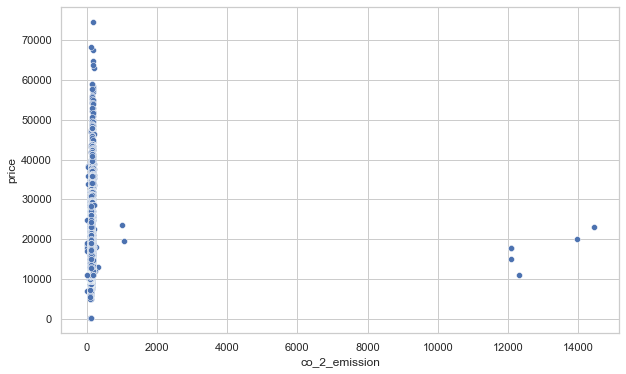

In [817]:
sns.scatterplot(x=df.co_2_emission, y=df.price);

In [818]:
df.groupby(["make_model","fuel","age"]).co_2_emission.apply(lambda x : x.fillna(x.median())).isnull().sum()

5

In [819]:
df["co_2_emission"]=df.groupby(["make_model","age","fuel"]).co_2_emission.apply(lambda x : x.fillna(x.median()))

In [820]:
df["co_2_emission"].isnull().sum()

5

In [821]:
df[df["co_2_emission"].isnull()]

,make_model,short_description,body_type,price,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country,age,fill_displacement
2614,Audi A2,"30 TDI Navi, Lane assist, Sitzheizung, Einpark...",Off-Road,28200.0,26166.0,1.0,Employee's car,1,"10/2019,Euro 6",NaN,4 (Green),NaN,NaN,Grey,Metallic,5.0,5.0,Manual,1600.0,4.0,front,Diesel (Particulate Filter),NaN,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",4 (Green),NaN,85.0,Cloth,Black,NaN,4.9,5.6,4.5,1.0,NaN
3356,Audi A3,S-Line e-tron 1.4,Compact,24950.0,57000.0,1.0,Used,1,NaN,NaN,NaN,Euro 6,NaN,Blue,Metallic,5.0,5.0,Semi-automatic,1400.0,4.0,front,Electric/Hybride,NaN,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Sport package,Sport sea...","ABS,Adaptive Cruise Control,Adaptive headlight...",NaN,6.0,150.0,Part leather,Black,NaN,NaN,NaN,NaN,3.0,1400.0
6802,Opel Astra,"K 1,4 CNG 5-tg Exclusive + WR",Sedans,12864.0,120000.0,1.0,Used,1,"08/2020,4 (Green)",NaN,NaN,NaN,NaN,Brown,Metallic,5.0,5.0,Manual,1400.0,4.0,front,LPG/CNG,NaN,NaN,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen","ABS,Adaptive headlights,Central door lock,Cent...",4 (Green),6.0,81.0,Cloth,Black,NaN,NaN,NaN,NaN,2.0,NaN
13397,Renault Clio,zoé life,Sedans,8490.0,23863.0,1.0,Used,NaN,NaN,NaN,NaN,NaN,NaN,White,Metallic,5.0,5.0,Automatic,1500.0,4.0,front,Electric/Hybride,NaN,NaN,"Air conditioning,Cruise control,Navigation system",On-board computer,NaN,Driver-side airbag,NaN,NaN,NaN,NaN,Black,NaN,NaN,NaN,NaN,3.0,NaN
15308,Renault Espace,Initiale Paris Energy TCe 200 EDC,Station wagon,30980.0,32000.0,1.0,Used,NaN,NaN,NaN,NaN,NaN,NaN,White,Metallic,5.0,5.0,Manual,1600.0,4.0,front,Benzine (Particulate Filter),NaN,Euro 5,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Trailer hitch","ABS,Adaptive Cruise Control,Alarm system,Centr...",NaN,7.0,147.0,Full leather,NaN,NaN,6.2,NaN,NaN,2.0,NaN


In [822]:
df.co_2_emission.describe()

count    15914.000000
mean       122.719995
std        248.570052
min          0.000000
25%        104.000000
50%        117.000000
75%        129.000000
max      14457.000000
Name: co_2_emission, dtype: float64

In [823]:
df.co_2_emission.median()

117.0

In [824]:
df["co_2_emission"].fillna(df.co_2_emission.median(),inplace=True)

In [825]:
df["co_2_emission"].isna().sum()
# böylece bu sütun doldurulmuş oldu.Kod kısalabilir mi bakılacak. 

0

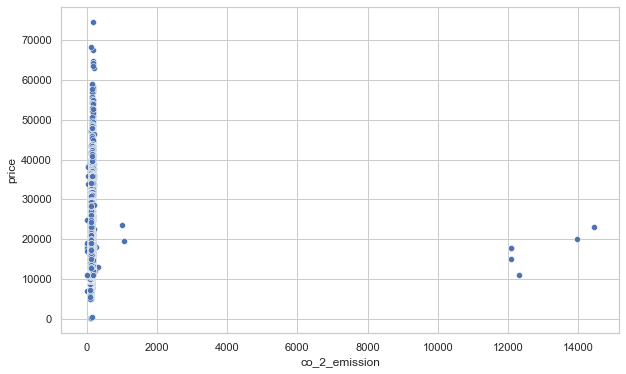

In [826]:
sns.scatterplot(x=df.co_2_emission, y=df.price);

### emission class

In [827]:
null_check("emission_class")

Column name : emission_class
------------------------------------------------------------
Number of nulls : 3628
Percent of nulls : % 22.79
Value_counts : 
 Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64


In [828]:
def check_other_column_values(row) :
    if any(i in str(row) for i in col_list) :
        return True
    else :
        False

def find_easy(col_main, col_other, pattern) :
    global col_list
    col_list = list(df[col_main].dropna().unique())
    if df[col_other].apply(check_other_column_values).isnull().sum() > 0 :
        df["find"] = df[col_other].str.extract(pattern)
        x_sum =df[df[col_main].isnull()]["find"].notna().sum()
        if x_sum > 0 :
            return f"{col_other} has {x_sum} values. You can fill {col_main} with them."
        else :
            return f"There isn't any useful information in {col_other} to fill {col_main}."

In [829]:
# col_list = list(df["emission_class"].dropna().unique())
# col_list

In [830]:
find_easy("emission_class","next_inspection",",(E.+)")

"There isn't any useful information in next_inspection to fill emission_class."

In [831]:
df.emission_class.apply(check_other_column_values).sum()

12291

In [832]:
find_easy("emission_class","inspection_new",",(E.+)")

'inspection_new has 18 values. You can fill emission_class with them.'

> Fonksiyonun değerleri doğru mu diye aşağıdaki gibi kontrol edelim:

In [833]:
df["fill"]=df.inspection_new.str.extract(",(E.+)")
df["fill"]

0              Euro 6
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
15914             NaN
15915             NaN
15916    Euro 6d-TEMP
15917             NaN
15918             NaN
Name: fill, Length: 15919, dtype: object

In [834]:
df["fill"].notna().sum()

690

In [835]:
df[df.emission_class.isnull()]["fill"].notna().sum()

18

> warranty sütununu dikkate alalım:

In [836]:
find_easy("emission_class","warranty",",*(E.+)")

'warranty has 125 values. You can fill emission_class with them.'

In [837]:
find_easy("emission_class","full_service","(E.+)")

'full_service has 433 values. You can fill emission_class with them.'

In [838]:
find_easy("emission_class","non_smoking_vehicle","(E.+)")

'non_smoking_vehicle has 120 values. You can fill emission_class with them.'

In [839]:
df.groupby(["make_model", "fuel"]).emission_class.describe().T

make_model Audi A1                                       \
fuel       Benzine Benzine (Particulate Filter)  Diesel   
count         1259                           88     261   
unique           5                            2       2   
top         Euro 6                 Euro 6d-TEMP  Euro 6   
freq          1051                           80     256   

make_model                                                 Audi A2 Audi A3  \
fuel       Diesel (Particulate Filter) Diesel (Particulate Filter) Benzine   
count                              446                           1     548   
unique                               2                           1       3   
top                             Euro 6                      Euro 6  Euro 6   
freq                               444                           1     431   

make_model                                                                   \
fuel       Benzine (Particulate Filter)  Diesel Diesel (Particulate Filter)   
count                               194     748                        1093   
unique                                2       4                           5   
top                        Euro 6d-TEMP  Euro 6                      Euro 6   
freq                                118     730                        1006   

make_model                          Opel Astra                               \
fuel       Electric/Hybride LPG/CNG    Benzine Benzine (Particulate Filter)   
count                     4      29        896                           63   
unique                    1       2          5                            3   
top                  Euro 6  Euro 6     Euro 6                 Euro 6d-TEMP   
freq                      4      25        699                           51   

make_model                                             Opel Corsa  \
fuel        Diesel Diesel (Particulate Filter) LPG/CNG    Benzine   
count          195                         729       1       1629   
unique           3                           4       1          5   
top         Euro 6                      Euro 6  Euro 6     Euro 6   
freq           162                         666       1       1120   

make_model                                                                   \
fuel       Benzine (Particulate Filter)  Diesel Diesel (Particulate Filter)   
count                                19      31                          60   
unique                                3       2                           2   
top                        Euro 6d-TEMP  Euro 6                      Euro 6   
freq                                 12      30                          59   

make_model Opel Insignia                                       \
fuel             Benzine Benzine (Particulate Filter)  Diesel   
count                607                           44     359   
unique                 5                            3       6   
top               Euro 6                 Euro 6d-TEMP  Euro 6   
freq                 427                           30     326   

make_model                             Renault Clio  \
fuel       Diesel (Particulate Filter)      Benzine   
count                              917          886   
unique                               6            6   
top                             Euro 6       Euro 6   
freq                               767          785   

make_model                                                                   \
fuel       Benzine (Particulate Filter)  Diesel Diesel (Particulate Filter)   
count                                 1     152                         312   
unique                                1       3                           5   
top                              Euro 6  Euro 6                      Euro 6   
freq                                  1     143                         295   

make_model                  Renault Duster Renault Espace  \
fuel       Electric/Hybride        Benzine        Benzine   
count            

In [840]:
df.groupby(["make_model","fuel"]).emission_class.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.emission_class.mode()[0])).value_counts()

Euro 6          13695
Euro 6d-TEMP     1915
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             42
Name: emission_class, dtype: int64

In [841]:
# df.groupby(["make_model","fuel"])['emission_class'].apply(
#                 lambda x : x.fillna(x.mode()[0]).fillna(df['emission_class'].interpolate().ffill().bfill())).isna().sum()

In [842]:
df["fill"] =df.full_service.str.extract("(E.+)")

In [843]:
df[df.emission_class.isnull()]["fill"].notna().sum()

433

In [844]:
df.groupby(["make_model", "age", "fuel", "emission_class"]).price.describe()

count  \
make_model     age fuel                         emission_class          
Audi A1        0.0 Benzine                      Euro 6          260.0   
                                                Euro 6d           5.0   
                                                Euro 6d-TEMP    192.0   
                   Benzine (Particulate Filter) Euro 6            6.0   
                                                Euro 6d-TEMP     72.0   
...                                                               ...   
Renault Espace 3.0 Diesel                       Euro 6           62.0   
                                                Euro 6d           1.0   
                                                Euro 6d-TEMP      3.0   
                   Diesel (Particulate Filter)  Euro 6          135.0   
                                                Euro 6c           1.0   

                                                                        mean  \
make_model     age fuel                         emission_class                 
Audi A1        0.0 Benzine                      Euro 6          24414.346154   
                                                Euro 6d         21510.000000   
                                                Euro 6d-TEMP    24005.635417   
                   Benzine (Particulate Filter) Euro 6          22623.333333   
                                                Euro 6d-TEMP    22393.930556   
...                                                                      ...   
Renault Espace 3.0 Diesel                       Euro 6          21775.790323   
                                                Euro 6d         17900.000000   
                                                Euro 6d-TEMP    22496.666667   
                   Diesel (Particulate Filter)  Euro 6          21299.555556   
                                                Euro 6c         17000.000000   

                                                                        std  \
make_model     age fuel                         emission_class                
Audi A1        0.0 Benzine                      Euro 6          3215.321913   
                                                Euro 6d          356.370594   
                                                Euro 6d-TEMP    3786.901866   
                   Benzine (Particulate Filter) Euro 6          4354.867331   
                                                Euro 6d-TEMP    3039.777773   
...                                                                     ...   
Renault Espace 3.0 Diesel                       Euro 6          3332.494365   
                                                Euro 6d                 NaN   
                                                Euro 6d-TEMP    1320.997098   
                   Diesel (Particulate Filter)  Euro 6          3276.571549   
                                                Euro 6c                 NaN   

                                                                    min  \
make_model     age fuel                         emission_class            
Audi A1        0.0 Benzine                      Euro 6          15550.0   
                                                Euro 6d         20990.0   
                                                Euro 6d-TEMP    16985.0   
                   Benzine (Particulate Filter) Euro 6          19490.0   
                                                Euro 6d-TEMP    17330.0   
...                                                                 ...   
Renault Espace 3.0 Diesel                       Euro 6          13000.0   
                                                Euro 6d         17900.0   
                                                Euro 6d-TEMP    21000.0   
                   Diesel (Particulate Filter)  Euro 6          12614.0   
                                                Euro 6c         17000.0   

                                                                     

In [845]:
# Consequently, we will drop with mode()
df["emission_class"]=df.groupby(["make_model","fuel"]).emission_class.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.emission_class.mode()[0]))

In [846]:
null_check("emission_class")

Column name : emission_class
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 Euro 6          13695
Euro 6d-TEMP     1915
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             42
Name: emission_class, dtype: int64


In [847]:
df.emission_class.size

15919

### comfort_convenience

In [848]:
df.groupby(["make_model", "body_type","age"]).comfort_convenience.describe().freq.sort_values(ascending=False)

make_model     body_type    age
Opel Corsa     Compact      0.0     91
Audi A3        Sedans       0.0     56
                            1.0     56
Audi A1        Sedans       1.0     49
               Compact      1.0     39
                                  ... 
Opel Insignia  Other        0.0      1
Opel Corsa     Transporter  0.0      1
Opel Insignia  Compact      1.0    NaN
               Other        3.0    NaN
Renault Clio   Van          2.0    NaN
Name: freq, Length: 153, dtype: object

In [849]:

df["comfort_convenience"]=df.groupby(["make_model", "body_type","age"]).comfort_convenience.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.comfort_convenience.mode()[0]))

In [850]:
df["comfort_convenience"].isnull().sum()

0

### entertainment_media

In [851]:
df.groupby(["make_model", "body_type","age"]).entertainment_media.describe().freq.sort_values(ascending=False)

make_model      body_type      age
Opel Insignia   Station wagon  1.0    152
Opel Corsa      Compact        0.0    141
Opel Astra      Sedans         1.0    112
                Station wagon  1.0    100
                Sedans         2.0     87
                                     ... 
Opel Insignia   Other          2.0    NaN
                               3.0    NaN
Renault Clio    Van            2.0    NaN
Renault Espace  Coupe          0.0    NaN
                               1.0    NaN
Name: freq, Length: 153, dtype: object

In [852]:

df["entertainment_media"]=df.groupby(["make_model", "body_type","age"]).entertainment_media.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.entertainment_media.mode()[0]))

In [853]:
df["entertainment_media"].isnull().sum()

0

### extras

In [854]:
df.extras.value_counts(dropna=False)

Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

In [855]:
df.groupby(["make_model", "body_type","age"]).extras.describe().T

make_model       Audi A1                                            \
body_type        Compact                                             
age                  0.0           1.0           2.0           3.0   
count                320           248           147           214   
unique                51            46            35            43   
top         Alloy wheels  Alloy wheels  Alloy wheels  Alloy wheels   
freq                  65            34            39            47   

make_model                                                     \
body_type                                               Coupe   
age                                                       2.0   
count                                                       1   
unique                                                      1   
top         Alloy wheels,Catalytic Converter,Sport seats,S...   
freq                                                        1   

make_model                                                                \
body_type                                            Other                 
age                                      3.0           0.0           1.0   
count                                      1             9             3   
unique                                     1             5             2   
top         Alloy wheels,Catalytic Converter  Alloy wheels  Alloy wheels   
freq                                       1             5             2   

make_model                                                                   \
body_type                                Sedans                               
age                           2.0           0.0           1.0           2.0   
count                           1           364           433           226   
unique                          1            61            60            57   
top         Roof rack,Sport seats  Alloy wheels  Alloy wheels  Alloy wheels   
freq                            1           175           107            58   

make_model                                                                   \
body_type                                                     Station wagon   
age                  3.0                                                0.0   
count                342                                                  1   
unique                61                                                  1   
top         Alloy wheels  Alloy wheels,Sport package,Sport seats,Voice C...   
freq                  82                                                  1   

make_model                                                      \
body_type                                                        
age                              1.0                       2.0   
count                             10                         3   
unique                             5                         3   
top         Alloy wheels,Sport seats  Alloy wheels,Sport seats   
freq                               6                         1   

make_model                                                          \
body_type                                                      Van   
age                                                       3.0  0.0   
count                                                       5    0   
unique                                                      5    0   
top         Alloy wheels,Sport package,Sport seats,Sport s...  NaN   
freq                                                        1  NaN   

make_model       Audi A2                                    Audi A3  \
body_type       Off-Road                                    Compact   
age                  1.0                                        0.0   
count                  1                                         17   
unique                 1                                          7   
top         Alloy wheels  Alloy wheels,Sport seats,Sport suspension   
freq                   1        

In [856]:
df.extras.mode()[0]

'Alloy wheels'

In [857]:
df["extras"]=df.groupby(["make_model", "body_type","age"]).extras.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.extras.mode()[0]))

In [858]:
df["extras"].isnull().sum()

0

### safety_security

In [859]:
df.safety_security.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

In [860]:
df.groupby(["make_model", "body_type","age"]).safety_security.describe().T

make_model                                            Audi A1  \
body_type                                             Compact   
age                                                       0.0   
count                                                     344   
unique                                                    119   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       30   

make_model                                                     \
body_type                                                       
age                                                       1.0   
count                                                     260   
unique                                                     77   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       39   

make_model                                                     \
body_type                                                       
age                                                       2.0   
count                                                     157   
unique                                                     67   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       29   

make_model                                                     \
body_type                                                       
age                                                       3.0   
count                                                     228   
unique                                                     83   
top         ABS,Central door lock,Daytime running lights,D...   
freq                                                       53   

make_model                                                     \
body_type                                               Coupe   
age                                                       2.0   
count                                                       1   
unique                                                      1   
top         ABS,Adaptive Cruise Control,Adaptive headlight...   
freq                                                        1   

make_model                                                     \
body_type                                                       
age                                                       3.0   
count                                                       1   
unique                                                      1   
top         ABS,Adaptive Cruise Control,Central door lock,...   
freq                                                        1   

make_model                                                     \
body_type                                               Other   
age                                                       0.0   
count                                                       9   
unique                                                      5   
top         Electronic stability control,Fog lights,Immobi...   
freq                                                        5   

make_model                                                     \
body_type                                                       
age                                                       1.0   
count                                                       3   
unique                                                      3   
top         ABS,Daytime running lights,Driver-side airbag,...   
freq                                                        1   

make_model                                                     \
body_type                                                       
age                                                       2.0   
count                                                       1   
unique                                                      1   
top         Adaptive Cruise

In [861]:
df.safety_security.mode()[0]

'ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control'

In [862]:
df["safety_security"]=df.groupby(["make_model", "body_type","age"]).safety_security.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.safety_security.mode()[0]))

In [863]:
df["safety_security"].isnull().sum()

0

### emission_label

In [864]:
null_check("emission_label")

Column name : emission_label
------------------------------------------------------------
Number of nulls : 11974
Percent of nulls : % 75.22
Value_counts : 
 NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64


It would be better to drop the emission_label column as other related columns are filled. Also 75% of it is empty.

In [865]:
df.drop("emission_label", axis=1, inplace=True)

In [866]:
df.shape

(15919, 40)

### gears

In [867]:
null_check("gears")

Column name : gears
------------------------------------------------------------
Number of nulls : 4712
Percent of nulls : % 29.6
Value_counts : 
 6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64


In [868]:
df.groupby(["make_model", "body_type", "gearing_type", "gears"]).price.describe()

count          mean  \
make_model     body_type gearing_type   gears                        
Audi A1        Compact   Automatic      5.0      3.0  22184.333333   
                                        6.0      6.0  21038.333333   
                                        7.0    199.0  22059.251256   
                                        8.0      1.0  16880.000000   
                         Manual         5.0    277.0  16329.469314   
...                                              ...           ...   
Renault Espace Van       Automatic      9.0      6.0  52208.500000   
                         Manual         6.0     50.0  22798.560000   
                                        7.0      1.0  36590.000000   
                         Semi-automatic 6.0     11.0  28885.454545   
                                        7.0      1.0  19900.000000   

                                                        std      min  \
make_model     body_type gearing_type   gears                          
Audi A1        Compact   Automatic      5.0     3421.301555  18497.0   
                                        6.0     4282.038845  16430.0   
                                        7.0     3918.115996  13990.0   
                                        8.0             NaN  16880.0   
                         Manual         5.0     3040.933205   9950.0   
...                                                     ...      ...   
Renault Espace Van       Automatic      9.0     2735.327458  48765.0   
                         Manual         6.0     6056.782702  12614.0   
                                        7.0             NaN  36590.0   
                         Semi-automatic 6.0    11439.109549  16900.0   
                                        7.0             NaN  19900.0   

                                                    25%      50%       75%  \
make_model     body_type gearing_type   gears                                
Audi A1        Compact   Automatic      5.0    20648.50  22800.0  24028.00   
                                        6.0    18725.00  20920.0  21060.00   
                                        7.0    18970.00  21790.0  24365.00   
                                        8.0    16880.00  16880.0  16880.00   
                         Manual         5.0    13990.00  15900.0  16940.00   
...                                                 ...      ...       ...   
Renault Espace Van       Automatic      9.0    50002.75  52711.0  54414.25   
                         Manual         6.0    18847.50  21937.5  25799.75   
                                        7.0    36590.00  36590.0  36590.00   
                         Semi-automatic 6.0    21450.00  24900.0  32750.00   
                                        7.0    19900.00  19900.0  19900.00   

                                                   max  
make_model     body_type gearing_type   gears           
Audi A1        Compact   Automatic      5.0    25256.0  
                                        6.0    28860.0  
                                        7.0    29181.0  
                                        8.0    16880.0  
                         Manual         5.0    22990.0  
...                                                ...  
Renault Espace Van       Automatic      9.0    54982.0  
                         Manual         6.0    47990.0  
                                        7.0    36590.0  
                         Semi-automatic 6.0    56950.0  
                                        7.0    19900.0  

[173 rows x 8 columns]

In [869]:
df.groupby(["make_model", "body_type", "gearing_type"]).gears.describe().T

make_model       Audi A1                                                     \
body_type        Compact                             Coupe     Other          
gearing_type   Automatic      Manual Semi-automatic Manual Automatic Manual   
count         209.000000  354.000000            3.0    1.0       3.0    4.0   
mean            6.947368    5.217514            7.0    5.0       7.0    5.0   
std             0.297595    0.413139            0.0    NaN       0.0    0.0   
min             5.000000    5.000000            7.0    5.0       7.0    5.0   
25%             7.000000    5.000000            7.0    5.0       7.0    5.0   
50%             7.000000    5.000000            7.0    5.0       7.0    5.0   
75%             7.000000    5.000000            7.0    5.0       7.0    5.0   
max             8.000000    6.000000            7.0    5.0       7.0    5.0   

make_model                                                          \
body_type                        Sedans                              
gearing_type Semi-automatic   Automatic      Manual Semi-automatic   
count                   1.0  421.000000  599.000000      52.000000   
mean                    7.0    6.909739    5.151920       6.980769   
std                     NaN    0.392095    0.363868       0.138675   
min                     7.0    5.000000    5.000000       6.000000   
25%                     7.0    7.000000    5.000000       7.000000   
50%                     7.0    7.000000    5.000000       7.000000   
75%                     7.0    7.000000    5.000000       7.000000   
max                     7.0    8.000000    7.000000       7.000000   

make_model                                       Audi A2    Audi A3  \
body_type    Station wagon                  Van Off-Road    Compact   
gearing_type     Automatic     Manual Automatic   Manual  Automatic   
count                  3.0  11.000000       1.0      0.0  60.000000   
mean                   7.0   5.090909       6.0      NaN   6.933333   
std                    0.0   0.301511       NaN      NaN   0.251549   
min                    7.0   5.000000       6.0      NaN   6.000000   
25%                    7.0   5.000000       6.0      NaN   7.000000   
50%                    7.0   5.000000       6.0      NaN   7.000000   
75%                    7.0   5.000000       6.0      NaN   7.000000   
max                    7.0   6.000000       6.0      NaN   7.000000   

make_model                                                                   \
body_type                              Convertible                    Coupe   
gearing_type     Manual Semi-automatic   Automatic Semi-automatic Automatic   
count         89.000000      14.000000         3.0       5.000000       4.0   
mean           6.000000       6.928571         7.0       6.600000       7.0   
std            0.150756       0.267261         0.0       0.547723       0.0   
min            5.000000       6.000000         7.0       6.000000       7.0   
25%            6.000000       7.000000         7.0       6.000000       7.0   
50%            6.000000       7.000000         7.0       7.000000       7.0   
75%            6.000000       7.000000         7.0       7.000000       7.0   
max            7.000000       7.000000         7.0       7.000000       7.0   

make_model                                                            \
body_type        Other                            Sedans               
gearing_type Automatic Manual Semi-automatic   Automatic      Manual   
count              5.0    5.0            3.0  857.000000  938.000000   
mean               7.0    6.0            7.0    6.915986    6.006397   
std                0.0    0.0            0.0    0.277571    0.092179   
min                7.0    6.0            7.0    6.000000    5.000000   
25%                7.0    6.0            7.0    7.000000    6.000000   
50%                7.0    6.0            7.0    7.000000    6.000000   
75%                7.0    6.0            7.0    7.000000   

In [870]:
df["gears"]=df.groupby(["make_model", "body_type","gearing_type"]).gears.apply(lambda x : x.fillna(x.median()).fillna(df.gears.median()))

In [871]:
null_check("gears") # pay attention to these values [1,2,3,4,9,50]

Column name : gears
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 6.0     8607
5.0     4250
7.0     2810
8.0      225
6.5       12
9.0        6
1.0        2
3.0        2
4.0        2
5.5        1
2.0        1
50.0       1
Name: gears, dtype: int64


### hp_kw column

In [872]:
null_check("hp_kw")

Column name : hp_kw
------------------------------------------------------------
Number of nulls : 88
Percent of nulls : % 0.55
Value_counts : 
 85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
70.0      888
125.0     707
51.0      695
55.0      569
118.0     516
92.0      466
121.0     392
147.0     380
77.0      345
56.0      286
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
NaN        88
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
82.0       22
52.0       22
78.0       20
1.0        20
294.0      18
146.0      18
141.0      16
57.0       10
104.0       8
120.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
90.0        4
76.0        4
65.0        4
149.0       3
80.0        3
168.0       3
98.0        3
93.0        3
228.0       2
270.0       2
53.0        2
140.0       2
86.0        2
1

In [873]:
df.groupby(["make_model", "body_type", "displacement_cc","cylinders","fuel"]).hp_kw.describe().T

make_model      Audi A1                                                      \
body_type       Compact                                                       
displacement_cc 300.0      900.0       1000.0                                 
cylinders           4.0        4.0         3.0                                
fuel            Benzine    Benzine     Benzine Benzine (Particulate Filter)   
count               1.0   5.000000  610.000000                    61.000000   
mean               85.0  62.000000   74.273770                    82.540984   
std                 NaN   4.472136    8.181568                     5.599327   
min                85.0  60.000000   60.000000                    70.000000   
25%                85.0  60.000000   70.000000                    85.000000   
50%                85.0  60.000000   70.000000                    85.000000   
75%                85.0  60.000000   85.000000                    85.000000   
max                85.0  70.000000   85.000000                    85.000000   

make_model                                             \
body_type                                               
displacement_cc                        1400.0           
cylinders              4.0     8.0         3.0          
fuel               Benzine Benzine     Benzine Diesel   
count             4.000000     1.0   54.000000   37.0   
mean             71.250000    70.0   92.685185   66.0   
std              10.307764     NaN    3.430298    0.0   
min              60.000000    70.0   92.000000   66.0   
25%              67.500000    70.0   92.000000   66.0   
50%              70.000000    70.0   92.000000   66.0   
75%              73.750000    70.0   92.000000   66.0   
max              85.000000    70.0  110.000000   66.0   

make_model                                               \
body_type                                                 
displacement_cc                                           
cylinders                                           4.0   
fuel            Diesel (Particulate Filter)     Benzine   
count                                 122.0   44.000000   
mean                                   66.0   93.659091   
std                                     0.0    5.229359   
min                                    66.0   92.000000   
25%                                    66.0   92.000000   
50%                                    66.0   92.000000   
75%                                    66.0   92.000000   
max                                    66.0  110.000000   

make_model                                           \
body_type                                             
displacement_cc                             1500.0    
cylinders                                       4.0   
fuel            Diesel (Particulate Filter) Benzine   
count                                   2.0    11.0   
mean                                   66.0   110.0   
std                                     0.0     0.0   
min                                    66.0   110.0   
25%                                    66.0   110.0   
50%                                    66.0   110.0   
75%                                    66.0   110.0   
max                                    66.0   110.0   

make_model                                                                \
body_type                                                                  
displacement_cc                                                  1600.0    
cylinders                                                            3.0   
fuel            Benzine (Particulate Filter) Diesel (Particulate Filter)   
count                                    3.0                         1.0   
mean                                   110.0                        66.0   
std                                      0.0                         NaN   
min                                    110.0                        66.0   
25%                                    110.0                  

In [874]:
df["hp_kw"] = df.groupby(["make_model", "displacement_cc", "cylinders", "fuel"]).hp_kw.apply(lambda x : x.fillna(x.median()).fillna(df.hp_kw.median()))

In [875]:
null_check("hp_kw")

Column name : hp_kw
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 85.0     2557
66.0     2124
81.0     1402
100.0    1311
110.0    1114
70.0      889
125.0     709
51.0      695
55.0      569
118.0     547
92.0      466
121.0     393
147.0     383
77.0      345
56.0      310
54.0      276
103.0     253
87.0      236
165.0     194
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
52.0       22
82.0       22
1.0        20
78.0       20
294.0      18
146.0      18
141.0      16
57.0       10
120.0       8
104.0       8
112.0       7
191.0       7
155.0       6
117.0       6
184.0       5
65.0        4
90.0        4
76.0        4
168.0       3
98.0        3
149.0       3
80.0        3
93.0        3
167.0       2
228.0       2
53.0        2
143.0       2
150.0       2
140.0       2
270

### upholstery_type

In [876]:
null_check("upholstery_type")

Column name : upholstery_type
------------------------------------------------------------
Number of nulls : 4871
Percent of nulls : % 30.6
Value_counts : 
 Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64


In [877]:
df.groupby(["make_model", "body_type"]).upholstery_type.describe().T

make_model Audi A1                                                 Audi A2  \
body_type  Compact         Coupe  Other Sedans Station wagon  Van Off-Road   
count          883             1     12    967            17    0        1   
unique           5             1      1      5             2    0        1   
top          Cloth  Part leather  Cloth  Cloth         Cloth  NaN    Cloth   
freq           807             1     12    862            15  NaN        1   

make_model Audi A3                                                   \
body_type  Compact   Convertible  Coupe  Other Sedans Station wagon   
count           78             5      3     10   1681           230   
unique           3             2      1      3      5             5   
top          Cloth  Part leather  Cloth  Cloth  Cloth         Cloth   
freq            44             3      3      5   1369           187   

make_model Opel Astra                                                          \
body_type     Compact         Coupe      Off-Road  Other Sedans Station wagon   
count              67             2             1      5    854           929   
unique              4             2             1      1      5             5   
top             Cloth  Part leather  Part leather  Cloth  Cloth         Cloth   
freq               57             1             1      5    737           719   

make_model Opel Corsa                                                 \
body_type     Compact  Coupe Off-Road  Other Sedans Transporter  Van   
count            1086      5        0     11    607           4    0   
unique              3      1        0      2      4           1    0   
top             Cloth  Cloth      NaN  Cloth  Cloth       Cloth  NaN   
freq             1066      5      NaN     10    590           4  NaN   

make_model Opel Insignia                                           \
body_type        Compact Coupe      Off-Road         Other Sedans   
count                 17     0             3             4    601   
unique                 3     0             3             2      4   
top         Full leather   NaN  Full leather  Part leather  Cloth   
freq                   9   NaN             1             3    320   

make_model                      Renault Clio                                \
body_type  Station wagon    Van      Compact         Coupe Off-Road  Other   
count               1312      1          310             1        2      9   
unique                 5      1            4             1        1      3   
top                Cloth  Cloth        Cloth  Full leather    Cloth  Cloth   
freq                 631      1          221             1        2      4   

make_model                                         Renault Duster  \
body_type  Sedans Station wagon Transporter    Van       Off-Road   
count         494           213           9      2             18   
unique          5             5           1      1              1   
top         Cloth         Cloth       Cloth  Cloth          Cloth   
freq          404           197           9      2             18   

make_model Renault Espace                                                  \
body_type         Compact Coupe      Off-Road         Other        Sedans   
count                   1     0             7             7            16   
unique                  1     0             3             2             3   
top                 Cloth   NaN  Full leather  Part leather  Part leather   
freq                    1   NaN             3             4            10   

make_model                                            
body_type  Station wagon   Transporter           Van  
count                 51            12           499  
unique                 3             3             4  
top         Full leather  Full leather  Full leather  
freq                  34             6           252

In [878]:

df["upholstery_type"]=df.groupby(["make_model", "body_type"]).upholstery_type.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.upholstery_type.mode()[0]))

In [879]:
null_check("upholstery_type")

Column name : upholstery_type
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 Cloth           12845
Part leather     1553
Full leather     1404
Velour             60
alcantara          57
Name: upholstery_type, dtype: int64


### upholstery_color

In [880]:
null_check("upholstery_color")

Column name : upholstery_color
------------------------------------------------------------
Number of nulls : 5022
Percent of nulls : % 31.55
Value_counts : 
 Black     8201
NaN       5022
Grey      1376
Other     1016
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64


In [881]:
df.groupby(["make_model", "body_type","upholstery_type"]).upholstery_color.describe().T

make_model      Audi A1                                             \
body_type       Compact                                              
upholstery_type   Cloth Full leather Part leather Velour alcantara   
count               837            6           46      6         7   
unique                4            1            2      2         1   
top               Black        Black        Black  Black     Black   
freq                657            6           45      5         7   

make_model                                                                   \
body_type              Coupe  Other Sedans                                    
upholstery_type Part leather  Cloth  Cloth Full leather Part leather Velour   
count                      1      6    903           16           65     10   
unique                     1      1      7            3            2      2   
top                    Other  Black  Black        Black        Black  Black   
freq                       1      6    696           13           62      8   

make_model                                                   Audi A2 Audi A3  \
body_type                 Station wagon                 Van Off-Road Compact   
upholstery_type alcantara         Cloth Part leather  Cloth    Cloth   Cloth   
count                  10            17            2      1        1     101   
unique                  2             2            1      1        1       3   
top                 Black         Black        Black  Black    Black   Black   
freq                    9            16            2      1        1      88   

make_model                                                                 \
body_type                                 Convertible               Coupe   
upholstery_type Full leather Part leather       Cloth Part leather  Cloth   
count                     19           14           2            2      3   
unique                     1            1           2            2      1   
top                    Black        Black       Other        Brown  Black   
freq                      19           14           1            1      3   

make_model                                                                   \
body_type        Other                     Sedans                             
upholstery_type  Cloth Part leather Velour  Cloth Full leather Part leather   
count                7            0      3   1394           54          207   
unique               2            0      2      8            4            5   
top              Black          NaN   Grey  Black        Black        Black   
freq                 5          NaN      2    944           39          175   

make_model                                                                \
body_type                        Station wagon                             
upholstery_type Velour alcantara         Cloth Full leather Part leather   
count                9         9           167            4           37   
unique               2         3             4            2            2   
top              Black     Black         Black        Black        Black   
freq                 7         6           144            3           21   

make_model                       Opel Astra                            \
body_type                           Compact                             
upholstery_type Velour alcantara      Cloth Full leather Part leather   
count                1         1         74            4            2   
unique               1         1          4            1            1   
top              Black     Black      Black        Black        Black   
freq                 1         1         67            4            2   

make_model                                                                \
body_type                  Coupe                  Off-Road  Other Sedans   
upholstery_type alcantara  Cloth Part leather Part leather  Cloth  Cloth   
count                   2  

In [882]:

df["upholstery_color"]=df.groupby(["make_model", "body_type","upholstery_type"]).upholstery_color.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.upholstery_color.mode()[0]))

In [883]:
null_check("upholstery_type")

Column name : upholstery_type
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 Cloth           12845
Part leather     1553
Full leather     1404
Velour             60
alcantara          57
Name: upholstery_type, dtype: int64


In [884]:
# Since there is no column that affects Price, it will be evaluated with graphics and dropped.
df["upholstery_color"].value_counts(dropna=False)  

Black     12813
Grey       1439
Other      1017
Brown       553
Beige        54
Blue         16
White        13
Red           9
Yellow        4
Orange        1
Name: upholstery_color, dtype: int64

### weight_kg

In [885]:
null_check("weight_kg")

Column name : weight_kg
------------------------------------------------------------
Number of nulls : 6974
Percent of nulls : % 43.81
Value_counts : 
 NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1960.0       1
1258.0       1
1167.0       1
1331.0       1
2037.0       1
Name: weight_kg, Length: 435, dtype: int64


In [886]:
df.groupby(["make_model", "body_type"]).weight_kg.describe().T

make_model      Audi A1                                                       \
body_type       Compact   Coupe        Other       Sedans Station wagon  Van   
count        513.000000     1.0     4.000000   925.000000     14.000000  0.0   
mean        1174.545809  1010.0  1212.500000  1259.656216   1228.571429  NaN   
std           98.329734     NaN    36.628768   176.672756    113.466847  NaN   
min          102.000000  1010.0  1165.000000  1035.000000   1125.000000  NaN   
25%         1135.000000  1010.0  1195.000000  1145.000000   1195.000000  NaN   
50%         1180.000000  1010.0  1217.500000  1195.000000   1205.000000  NaN   
75%         1200.000000  1010.0  1235.000000  1255.000000   1215.000000  NaN   
max         1792.000000  1010.0  1250.000000  1720.000000   1580.000000  NaN   

make_model  Audi A2      Audi A3                                         \
body_type  Off-Road      Compact  Convertible        Coupe        Other   
count           0.0   157.000000     7.000000     3.000000     3.000000   
mean            NaN  1314.636943  1519.285714  1260.000000  1318.333333   
std             NaN   160.671593   129.113276    17.320508   100.166528   
min             NaN  1155.000000  1355.000000  1250.000000  1205.000000   
25%             NaN  1260.000000  1415.000000  1250.000000  1280.000000   
50%             NaN  1280.000000  1555.000000  1250.000000  1355.000000   
75%             NaN  1290.000000  1605.000000  1265.000000  1375.000000   
max             NaN  1890.000000  1685.000000  1280.000000  1395.000000   

make_model                              Opel Astra                   \
body_type        Sedans Station wagon      Compact   Coupe Off-Road   
count       1627.000000    113.000000   113.000000     1.0      1.0   
mean        1395.619545   1318.362832  1302.548673  1350.0   1340.0   
std          172.074921     72.430516    75.356177     NaN      NaN   
min         1041.000000   1180.000000  1163.000000  1350.0   1340.0   
25%         1310.000000   1265.000000  1263.000000  1350.0   1340.0   
50%         1350.000000   1335.000000  1325.000000  1350.0   1340.0   
75%         1365.000000   1365.000000  1360.000000  1350.0   1340.0   
max         1905.000000   1585.000000  1503.000000  1350.0   1340.0   

make_model                                           Opel Corsa               \
body_type         Other       Sedans Station wagon      Compact        Coupe   
count         54.000000   500.000000    596.000000   508.000000    10.000000   
mean        1325.407407  1328.364000   1403.741611  1174.057087  1203.000000   
std           51.711653    86.029772    129.147536    91.265585   161.726106   
min         1263.000000  1188.000000   1178.000000     1.000000  1066.000000   
25%         1278.000000  1273.000000   1337.000000  1163.000000  1120.000000   
50%         1350.000000  1308.000000   1393.000000  1163.000000  1159.500000   
75%         1360.000000  1360.000000   1425.000000  1199.000000  1199.000000   
max         1503.000000  1900.000000   1985.000000  1665.000000  1635.000000   

make_model                                                              \
body_type      Off-Road        Other       Sedans  Transporter     Van   
count          3.000000    79.000000   634.000000     6.000000     2.0   
mean        1187.666667  1169.253165  1171.566246  1181.000000  1124.0   
std           42.723920    18.735314    78.367382    19.718012     0.0   
min         1163.000000  1141.000000  1086.000000  1163.000000  1124.0   
25%         1163.000000  1163.000000  1141.000000  1163.000000  1124.0   
50%         1163.000000  1163.000000  1163.000000  1181.000000  1124.0   
75%         1200.000000  1163.000000  1173.000000  1199.000000  1124.0   
max         1237.000000  1237.000000  1960.000000  1199.000000  1124.0   

make_model Opel Insignia                                               \
body_type        Compact Coupe     Off-Road        Other       Sedans   
count           20.00000   0.0     6.000000    39

In [887]:

df["weight_kg"]=df.groupby(["make_model", "body_type"]).weight_kg.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.weight_kg.mode()[0]))

In [888]:
null_check("weight_kg")

Column name : weight_kg
------------------------------------------------------------
Number of nulls : 0
Percent of nulls : % 0.0
Value_counts : 
 1163.0    1591
1360.0    1406
1487.0     955
1135.0     826
1425.0     731
          ... 
1331.0       1
1132.0       1
1252.0       1
1792.0       1
2037.0       1
Name: weight_kg, Length: 434, dtype: int64


### consumption_comb, consumption_city, consumption_country

In [889]:
df[['consumption_comb', 'consumption_city','consumption_country']].isnull().sum()

consumption_comb       2033
consumption_city       2436
consumption_country    2376
dtype: int64

In [890]:
(df["consumption_country"]*63 + df["consumption_city"]*37)/100

0        3.796
1        5.588
2        3.770
3        3.796
4        4.096
         ...  
15914    5.255
15915    7.373
15916    5.255
15917    5.255
15918    6.810
Length: 15919, dtype: float64

In [891]:
 df["consumption_comb"].fillna((df["consumption_country"]*63 + df["consumption_city"]*37)/100).isnull().sum()

1925

In [892]:
df["consumption_comb"]=df["consumption_comb"].fillna((df["consumption_country"]*63 + df["consumption_city"]*37)/100)

In [893]:
df["consumption_comb"].isnull().sum()

1925

In [894]:
df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].describe().T

make_model      Audi A1                                                      \
body_type       Compact                                                       
fuel            Benzine                                                       
displacement_cc 300.0     900.0       1000.0     1400.0     1500.0  1800.0    
count               1.0  5.000000  592.000000  94.000000  11.000000     2.0   
mean                4.8  4.240000    4.548649   5.036170   5.054545     5.8   
std                 NaN  0.089443    0.466580   0.135877   0.052223     0.0   
min                 4.8  4.200000    4.000000   4.700000   5.000000     5.8   
25%                 4.8  4.200000    4.400000   4.900000   5.000000     5.8   
50%                 4.8  4.200000    4.400000   5.100000   5.100000     5.8   
75%                 4.8  4.200000    4.800000   5.100000   5.100000     5.8   
max                 4.8  4.400000   13.800000   5.200000   5.100000     5.8   

make_model                                                            \
body_type                                                              
fuel                            Benzine (Particulate Filter)           
displacement_cc 2000.0  9800.0                       1000.0  1500.0    
count               8.0     1.0                    60.000000     3.0   
mean                6.0     4.8                     4.850000     5.1   
std                 0.0     NaN                     0.177076     0.0   
min                 6.0     4.8                     4.400000     5.1   
25%                 6.0     4.8                     4.800000     5.1   
50%                 6.0     4.8                     4.900000     5.1   
75%                 6.0     4.8                     4.900000     5.1   
max                 6.0     4.8                     5.600000     5.1   

make_model                                                                    \
body_type                                                                      
fuel                Diesel            Diesel (Particulate Filter)              
displacement_cc    1400.0     1600.0                      1400.0     1600.0    
count            34.000000  26.000000                  118.000000  41.000000   
mean              3.841176   3.653846                    3.919492   3.851220   
std               0.265282   0.273102                    0.163435   0.138061   
min               3.000000   3.000000                    3.400000   3.500000   
25%               3.700000   3.700000                    3.900000   3.700000   
50%               3.800000   3.700000                    3.900000   3.800000   
75%               4.100000   3.700000                    4.000000   4.000000   
max               4.100000   4.000000                    4.100000   4.000000   

make_model                                                     \
body_type         Coupe                                 Other   
fuel            Benzine Diesel (Particulate Filter)   Benzine   
displacement_cc 1000.0                      1600.0    1000.0    
count               1.0                         0.0  5.000000   
mean                4.2                         NaN  4.880000   
std                 NaN                         NaN  0.576194   
min                 4.2                         NaN  4.200000   
25%                 4.2                         NaN  4.800000   
50%                 4.2                         NaN  4.800000   
75%                 4.2                         NaN  4.800000   
max                 4.2                         NaN  5.800000   

make_model                                                                \
body_type                                                                  
fuel            Benzine (Particulate Filter) Diesel (Particulate Filter)   
displacement_cc                      1000.0                      1600.0    
count                                    1.0                         2.0   
mean                                     4.7                    

In [895]:
df.groupby(["make_model", "body_type","fuel","hp_kw"])['consumption_comb'].describe().T

make_model    Audi A1                                                      \
body_type     Compact                                                       
fuel          Benzine                                                       
hp_kw           60.0        70.0       71.0        85.0       92.0  93.0    
count       56.000000  309.000000  29.000000  205.000000  87.000000   1.0   
mean         4.310714    4.430097   4.351724    4.815122   5.057471   4.9   
std          0.100324    0.563356   0.087099    0.192801   0.112717   NaN   
min          4.200000    4.000000   4.200000    4.000000   4.900000   4.9   
25%          4.200000    4.300000   4.400000    4.800000   4.900000   4.9   
50%          4.400000    4.400000   4.400000    4.900000   5.100000   4.9   
75%          4.400000    4.500000   4.400000    4.900000   5.100000   4.9   
max          4.400000   13.800000   4.400000    4.900000   5.200000   4.9   

make_model                                                                 \
body_type                                                                   
fuel                              Benzine (Particulate Filter)              
hp_kw           110.0 141.0 147.0                        70.0       85.0    
count       17.000000   2.0   8.0                    10.000000  50.000000   
mean         4.947059   5.8   6.0                     4.810000   4.858000   
std          0.169991   0.0   0.0                     0.433205   0.053795   
min          4.700000   5.8   6.0                     4.400000   4.700000   
25%          4.700000   5.8   6.0                     4.600000   4.800000   
50%          5.000000   5.8   6.0                     4.600000   4.900000   
75%          5.100000   5.8   6.0                     4.825000   4.900000   
max          5.100000   5.8   6.0                     5.600000   4.900000   

make_model                                                                \
body_type                                                                  
fuel                 Diesel                  Diesel (Particulate Filter)   
hp_kw      110.0      66.0       85.0  86.0                        66.0    
count        3.0  34.000000  26.000000   0.0                  119.000000   
mean         5.1   3.841176   3.653846   NaN                    3.917647   
std          0.0   0.265282   0.273102   NaN                    0.163980   
min          5.1   3.000000   3.000000   NaN                    3.400000   
25%          5.1   3.700000   3.700000   NaN                    3.900000   
50%          5.1   3.800000   3.700000   NaN                    3.900000   
75%          5.1   4.100000   3.700000   NaN                    4.000000   
max          5.1   4.100000   4.000000   NaN                    4.100000   

make_model                                                                     \
body_type               Coupe                               Other               
fuel                  Benzine Diesel (Particulate Filter) Benzine               
hp_kw           85.0    70.0                        85.0    60.0  70.0  85.0    
count       40.000000     1.0                         0.0     1.0   0.0   3.0   
mean         3.855000     4.2                         NaN     4.2   NaN   4.8   
std          0.137654     NaN                         NaN     NaN   NaN   0.0   
min          3.500000     4.2                         NaN     4.2   NaN   4.8   
25%          3.700000     4.2                         NaN     4.2   NaN   4.8   
50%          3.800000     4.2                         NaN     4.2   NaN   4.8   
75%          4.000000     4.2                         NaN     4.2   NaN   4.8   
max          4.000000     4.2                         NaN     4.2   NaN   4.8   

make_model                                                                 \
body_type                                                                   
fuel             Benzine (Particulate Filter) Diesel (Particulate Filter)   
hp_kw      140.0                 

In [896]:
df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].apply(lambda x : x.fillna(x.interpolate().ffill().bfill()).fillna(df['consumption_comb'].median())).isna().sum()

0

In [897]:
df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].apply(lambda x : x.fillna(x.interpolate().ffill().bfill()).fillna(df['consumption_comb'].median())).value_counts(dropna=False)

5.400000    812
3.900000    776
4.000000    747
4.800000    725
5.100000    705
           ... 
3.771429      1
3.928571      1
5.666667      1
5.733333      1
6.466667      1
Name: consumption_comb, Length: 405, dtype: int64

In [898]:
df["consumption_comb"] = df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].apply(lambda x : x.fillna(x.interpolate().ffill().bfill()).fillna(df['consumption_comb'].mode()[0]))

In [899]:
# df['cons_comb'] = df.groupby(['make_model', 'type', 'age', 'registration_month'])['cons_comb'].apply(lambda x : x.fillna(x.median()))
# df['cons_comb'] = df.groupby(['make_model', 'type'])['cons_comb'].apply(lambda x : x.fillna(x.interpolate().bfill().ffill()))

In [900]:
df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].apply(lambda x : x.fillna(x.interpolate().ffill().bfill()).fillna(df['consumption_comb'].mode()[0])).isnull().sum()

0

In [901]:
df.shape

(15919, 40)

In [902]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'km',
       'prev_owner', 'type', 'previous_owners', 'next_inspection',
       'inspection_new', 'warranty', 'full_service', 'non_smoking_vehicle',
       'body_color', 'paint_type', 'nr_of_doors', 'nr_of_seats',
       'gearing_type', 'displacement_cc', 'cylinders', 'drive_chain', 'fuel',
       'co_2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'upholstery_type', 'upholstery_color', 'weight_kg', 'consumption_comb',
       'consumption_city', 'consumption_country', 'age', 'fill_displacement',
       'find', 'fill'],
      dtype='object')

In [903]:
col_drop = ["previous_owners", "short_description", "next_inspection", "inspection_new", "non_smoking_vehicle", "full_service", "warranty", "consumption_country","consumption_city", 'fill_displacement',
       'fill_displacement', 'find', 'fill']

In [904]:
df.drop(columns=col_drop,inplace=True)

In [905]:
df.shape

(15919, 28)

In [906]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'prev_owner', 'type',
       'body_color', 'paint_type', 'nr_of_doors', 'nr_of_seats',
       'gearing_type', 'displacement_cc', 'cylinders', 'drive_chain', 'fuel',
       'co_2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'upholstery_type', 'upholstery_color', 'weight_kg', 'consumption_comb',
       'age'],
      dtype='object')

In [907]:
df.isnull().sum()/df.shape[0]*100

make_model             0.0
body_type              0.0
price                  0.0
km                     0.0
prev_owner             0.0
type                   0.0
body_color             0.0
paint_type             0.0
nr_of_doors            0.0
nr_of_seats            0.0
gearing_type           0.0
displacement_cc        0.0
cylinders              0.0
drive_chain            0.0
fuel                   0.0
co_2_emission          0.0
emission_class         0.0
comfort_convenience    0.0
entertainment_media    0.0
extras                 0.0
safety_security        0.0
gears                  0.0
hp_kw                  0.0
upholstery_type        0.0
upholstery_color       0.0
weight_kg              0.0
consumption_comb       0.0
age                    0.0
dtype: float64

In [909]:
df.to_csv("filled_scout.csv", index=False)

In [910]:
pd.read_csv("filled_scout.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  float64
 3   km                   15919 non-null  float64
 4   prev_owner           15919 non-null  float64
 5   type                 15919 non-null  object 
 6   body_color           15919 non-null  object 
 7   paint_type           15919 non-null  object 
 8   nr_of_doors          15919 non-null  float64
 9   nr_of_seats          15919 non-null  float64
 10  gearing_type         15919 non-null  object 
 11  displacement_cc      15919 non-null  float64
 12  cylinders            15919 non-null  float64
 13  drive_chain          15919 non-null  object 
 14  fuel                 15919 non-null  object 
 15  co_2_emission        15919 non-null 